<a href="https://colab.research.google.com/github/stancanrold/Predicting-loan-default/blob/master/problem_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modules and Data

In [ ]:
import pandas as pd
import numpy as np

import math

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Loading the data
from google.colab import files
uploaded = files.upload()

Saving credit_card_default.csv to credit_card_default (3).csv


In [ ]:
credit_card_default = pd.read_csv("credit_card_default.csv")
credit_card_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4798 non-null   int64  
 1   ID          4798 non-null   int64  
 2   LIMIT_BAL   4798 non-null   int64  
 3   SEX         4798 non-null   int64  
 4   EDUCATION   4798 non-null   int64  
 5   MARRIAGE    4798 non-null   int64  
 6   AGE         4798 non-null   int64  
 7   PAY_0       4798 non-null   int64  
 8   PAY_2       4798 non-null   int64  
 9   PAY_3       4798 non-null   int64  
 10  PAY_4       4798 non-null   int64  
 11  PAY_5       4798 non-null   int64  
 12  PAY_6       4798 non-null   int64  
 13  BILL_AMT1   4798 non-null   int64  
 14  BILL_AMT2   4798 non-null   int64  
 15  BILL_AMT3   4798 non-null   int64  
 16  BILL_AMT4   4798 non-null   int64  
 17  BILL_AMT5   4798 non-null   int64  
 18  BILL_AMT6   4798 non-null   int64  
 19  PAY_AMT1    4798 non-null  

In [ ]:
# rename dataset
raw_data = credit_card_default


In [ ]:
#update column name for 'PAY_0' to 'PAY_1'

raw_data.rename(columns= {
    'PAY_0':'PAY_1',  
},   inplace=True) 
raw_data.head()


,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,u,train,test,validate,data.group
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1.0,0.287578,1.0,0.0,0.0,1.0
1,2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1.0,0.788305,0.0,0.0,1.0,3.0
2,3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0.0,0.408977,1.0,0.0,0.0,1.0
3,4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0.0,0.883017,0.0,0.0,1.0,3.0
4,5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0.0,0.940467,0.0,0.0,1.0,3.0


In [ ]:
## Explore & Transform - LIMIT_BAL
##data description:** integer - individual consumer credit & supplementary credit in NT Dollar

In [ ]:
raw_data['LIMIT_BAL'].describe()

count       4798.000000
mean      165850.354314
std       130658.823962
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       230000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [ ]:
%pip install woeBinningPandas



In [ ]:
import numpy as np

import math

import warnings
import woeBinningPandas
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



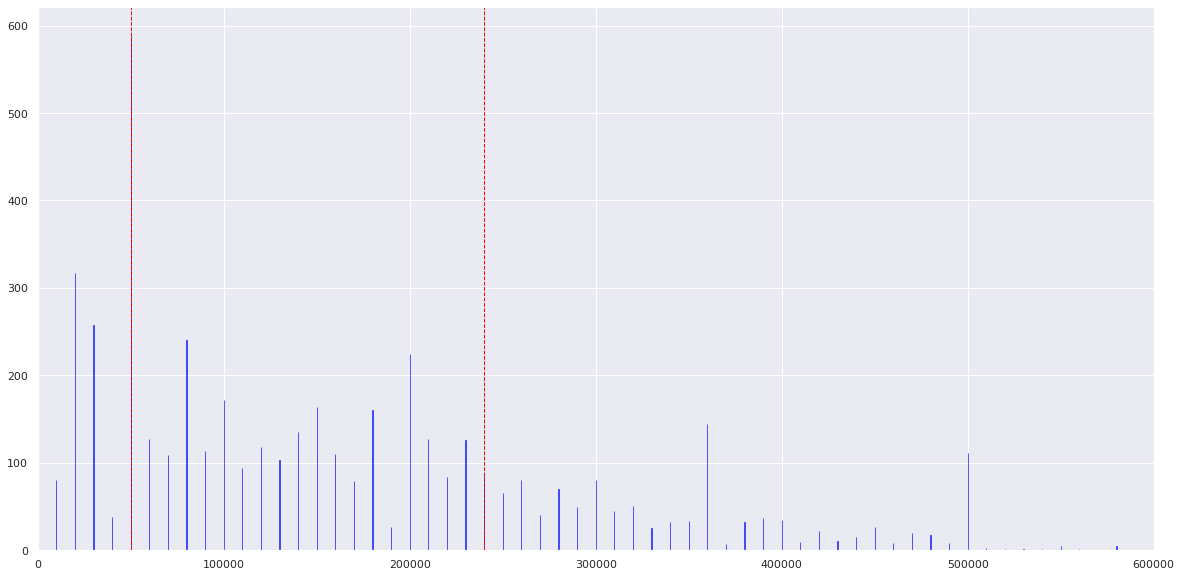

In [ ]:
plt.hist(raw_data["LIMIT_BAL"], bins=10000, color='c', edgecolor='blue', alpha=0.65)
plt.xlim(0,600000)
plt.axvline(50000, color='red', linestyle='dashed', linewidth=1)
plt.axvline(240000, color='red', linestyle='dashed', linewidth=1)


In [ ]:
limit_bal_bin = raw_data.iloc[ : , [2,25]]
limit_bal_bin.head()

,LIMIT_BAL,DEFAULT
0,20000,1.0
1,120000,1.0
2,90000,0.0
3,50000,0.0
4,50000,0.0


In [ ]:
limit_bal_bin=woeBinningPandas.woe_binning(raw_data,"DEFAULT","LIMIT_BAL", 0.05, 0, 0.1, 50, 'DEFAULT')

# bins results
limit_bal_bin

#availabe bins
limit_bal_bin["cutpoints_final"]


/usr/local/lib/python3.6/dist-packages/woeBinningPandas/__init__.py:512: UserWarning: Incorrect specification of data frame and/or variables.
  warnings.warn("Incorrect specification of data frame and/or variables.")
/usr/local/lib/python3.6/dist-packages/woeBinningPandas/__init__.py:544: UserWarning: Incorrect variable specification.
Target variable must have two distinct values (NAs are accepted).
  warnings.warn("Incorrect variable specification.\nTarget variable must have two distinct values (NAs are accepted).")


predictor_var_binned
(-inf, 30000.0]            -inf
(30000.0, 100000.0]     30000.0
(100000.0, inf]        100000.0
Missing                     inf
Name: cutpoints_final, dtype: float64

In [ ]:
#recommended transformation - LIMIT_BAL** Dummy variables if LIMIT_BAL is below 30k or above 60k   
#Leave out >30k & < 160k as cross correlation would render this variable irrelevant.
#recoding function
def my_recode1(series):
    if series <=30000:
        return 1
    else:
        return 0

def my_recode2(series):
    if series > 160000:
        return 1
    else:
        return 0

raw_data["LIMIT_BAL_below_30k"] = raw_data["LIMIT_BAL"].apply(my_recode1)
raw_data["LIMIT_BAL_above_160k"] = raw_data["LIMIT_BAL"].apply(my_recode2)

raw_data[["LIMIT_BAL_below_30k","LIMIT_BAL_above_160k" ]].describe()

,LIMIT_BAL_below_30k,LIMIT_BAL_above_160k
count,4798.000000,4798.000000
mean,0.136515,0.422259
std,0.343371,0.493971
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [ ]:
##Binning for regression analysis - in case of tree analysis, continuous variable recommended.**   
   
## Explore & Transform - Demographics: 
##data descriptions:**   
##**SEX** Categorical: (1) = Male; (2) = Female   
##**EDUCATION** Categorical: (1) = graduate school; (2) = university; (3) = high school; (4) = others   
##**MARRIAGE** Categorical: (1) = married; (2) = single; (3) = others   

raw_data[["SEX", "EDUCATION","MARRIAGE" ]].describe()

,SEX,EDUCATION,MARRIAGE
count,4798.000000,4798.000000,4798.000000
mean,1.571280,1.822009,1.565236
std,0.494945,0.766725,0.524386
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


Text(0, 0.5, 'Observations Count')

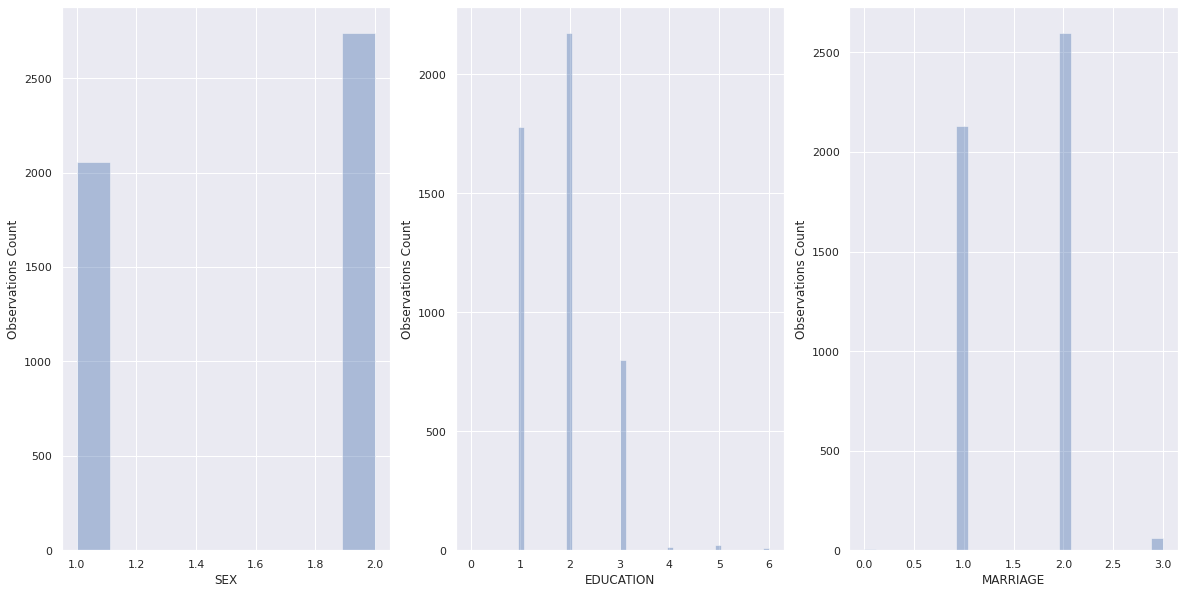

In [ ]:
#Histogram: SEX, EDUCATION, MARRIAGE**

# Getting social predictors only 
dem_raw_data = raw_data[["SEX", "EDUCATION","MARRIAGE" ]]
dem_raw_data.columns
sns.set(rc={'figure.figsize':(20,10)})

fig, axs = plt.subplots(ncols=3)
sns.distplot(raw_data['SEX'],kde=False, ax=axs[0])
axs[0].set_ylabel("Observations Count")
sns.distplot(raw_data['EDUCATION'], kde=False, ax=axs[1])
axs[1].set_ylabel("Observations Count")
sns.distplot(raw_data['MARRIAGE'],kde=False, ax=axs[2])
axs[2].set_ylabel("Observations Count")


In [ ]:
#observations & recommendations for transformation:** 
   
#SEX** predominately female, suggestion to change categories to (0) = male; (1) = female 
def my_recode3(series):
  if series == 2:
    return  1
  else :
    return 0

raw_data["SEX_FEMALE"] = raw_data["SEX"].apply(my_recode3)



In [ ]:
#MARRIAGE** 'other' values (0) & (3) outliers - change categories to (1) = Married; (0) = Not Married
def my_recode4(series):
  if series == 1:
    return  1
  else :
    return 0

raw_data["Married_Y"] = raw_data["MARRIAGE"].apply(my_recode4)
raw_data["MARRIAGE"].describe()
  

count    4798.000000
mean        1.565236
std         0.524386
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: MARRIAGE, dtype: float64

In [ ]:
##EDUCATION - Categorical frequency**

s = raw_data["EDUCATION"].value_counts()
s

def my_recode5(series):
  d= series * 100

  return f"{round(d, 1)} %"

ed_table = pd.DataFrame(s).reset_index()
ed_table.columns = ['EDUCATION', 'FREQUENCY']
ed_table["PCT"] = ed_table["FREQUENCY"]/30000
ed_table["PCT"] = ed_table["PCT"].apply(my_recode5)
ed_table


,EDUCATION,FREQUENCY,PCT
0,2,2175,7.2 %
1,1,1779,5.9 %
2,3,798,2.7 %
3,5,23,0.1 %
4,4,14,0.0 %
5,6,8,0.0 %
6,0,1,0.0 %


In [ ]:
ed_df3= raw_data.iloc[:, [4,25]]

def my_recode6(series):
  if series > 3:
    return 0
  else:
    return series



ed_df3["EDUCATION"] = ed_df3["EDUCATION"].apply(my_recode6)


s = ed_df3["EDUCATION"].value_counts()
ed_table2 = pd.DataFrame(s).reset_index()
ed_table2.columns =["EDUCATION", "FREQUENCY"]

ed_table2["PCT"] = ed_table2["FREQUENCY"]/30000
ed_table2["PCT"] = ed_table2["PCT"].apply(my_recode5)
ed_table2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,EDUCATION,FREQUENCY,PCT
0,2,2175,7.2 %
1,1,1779,5.9 %
2,3,798,2.7 %
3,0,46,0.2 %


In [ ]:
%pip install scorecardpy



In [ ]:

import scorecardpy as sc

bins = sc.woebin(ed_df3, y="DEFAULT", x="EDUCATION")
bins


[INFO] creating woe binning ...


/usr/local/lib/python3.6/dist-packages/scorecardpy/condition_fun.py:96: UserWarning: There are NaNs in 'DEFAULT' column. The rows with NaN in 'DEFAULT' were removed from dat.
  warnings.warn("There are NaNs in \'{}\' column. The rows with NaN in \'{}\' were removed from dat.".format(y,y))
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


{'EDUCATION':     variable         bin  count  ...  total_iv  breaks  is_special_values
 0  EDUCATION  [-inf,2.0)   1825  ...  0.018157     2.0              False
 1  EDUCATION   [2.0,3.0)   2174  ...  0.018157     3.0              False
 2  EDUCATION   [3.0,inf)    798  ...  0.018157     inf              False
 
 [3 rows x 12 columns]}

In [ ]:
#EDUCATION - recommended transformation** Reduce variable to two classes:
#ED_Grad_Other** = (0) = high school/university; (1\) = Graduate/Other

def my_recode7(series):
  if (series < 1) | (series > 3 ) | (series == 1):
    return 1
  else:
    return 0

raw_data["ED_Grad_other"] = raw_data["EDUCATION"].apply(my_recode7)


s = raw_data["ED_Grad_other"].value_counts()
ed_table3 = pd.DataFrame(s).reset_index()
ed_table3.columns =["EDUCATION", "FREQUENCY"]

ed_table3["PCT"] = ed_table3["FREQUENCY"]/9572
ed_table3["PCT"] = ed_table3["PCT"].apply(my_recode5)
ed_table3



,EDUCATION,FREQUENCY,PCT
0,0,2973,31.1 %
1,1,1825,19.1 %


In [ ]:


## Explore & Transform - AGE

#AGE - data description:** integer - age of customer in years

raw_data["AGE"].describe()

count    4798.000000
mean       35.369946
std         9.279465
min        21.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        75.000000
Name: AGE, dtype: float64

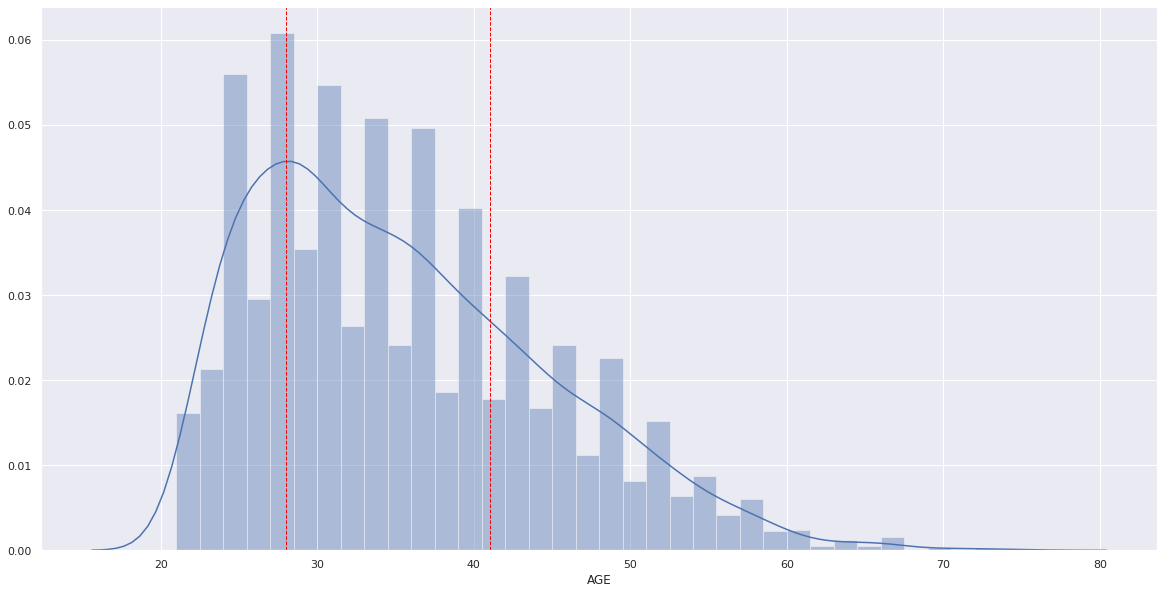

In [ ]:
#AGE - Histogram**

# Getting ID and AGE columns only
age_raw_data = raw_data[["AGE","ID"]]

sns.distplot(age_raw_data["AGE"] )
# plt.xlim(0,)
plt.axvline(28, color='red', linestyle='dashed', linewidth=1)
plt.axvline(41, color='red', linestyle='dashed', linewidth=1)


[INFO] creating woe binning ...


/usr/local/lib/python3.6/dist-packages/scorecardpy/condition_fun.py:96: UserWarning: There are NaNs in 'DEFAULT' column. The rows with NaN in 'DEFAULT' were removed from dat.
  warnings.warn("There are NaNs in \'{}\' column. The rows with NaN in \'{}\' were removed from dat.".format(y,y))
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


{'AGE': <Figure size 1440x720 with 2 Axes>}

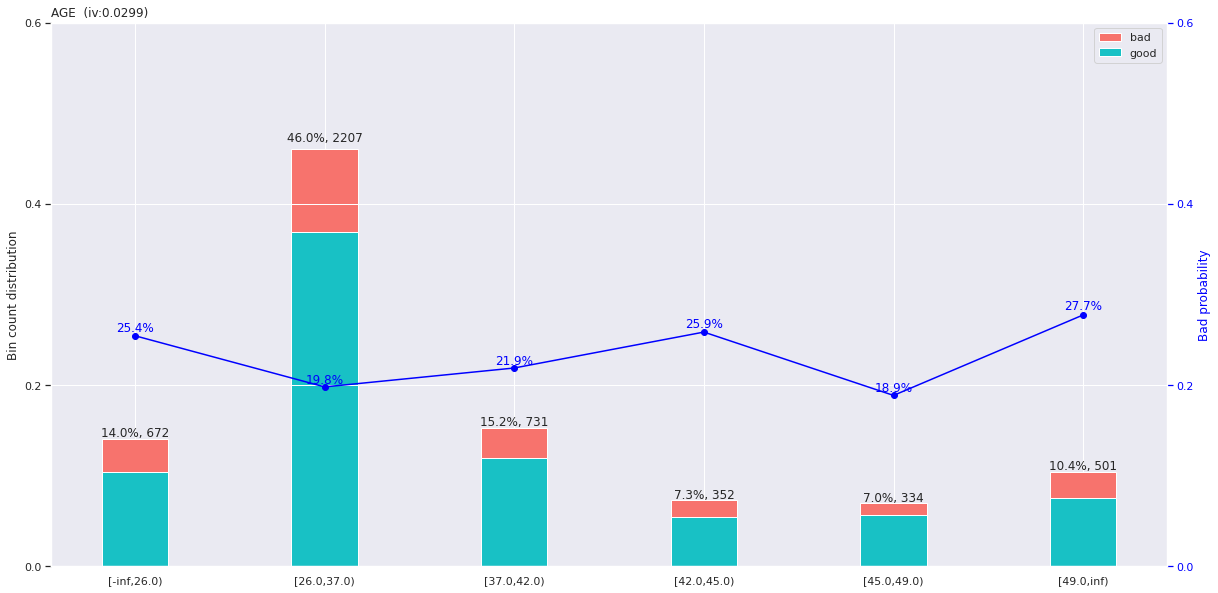

In [ ]:
#AGE - bin analysis** - investigate binning options for variable split
# Check bins LIMIT_BAL

AGE_bins = raw_data[["AGE","DEFAULT"]]
AGE_bins

bins = sc.woebin(AGE_bins, y="DEFAULT")
sc.woebin_plot(bins)

In [ ]:
#AGE recommended transformation** Dummy variables if AGE is below 25, 25:35 & above 40   
#Leave out >35 & < 40 as cross correlation would render this variable irrelevant.

def my_recode8(series):
  if series <= 25 :
    return 1
  else:
    return 0

def my_recode9(series):
  if (series > 25) | (series <= 35):
    return 1
  else:
    return 0
def my_recode10(series):
  if series > 40:
    return 1
  else:
    return 0

raw_data["AGE_below_25"] = raw_data["AGE"].apply(my_recode8)
raw_data["AGE_25to35"] = raw_data["AGE"].apply(my_recode9)  
raw_data["AGE_above_40"] = raw_data["AGE"].apply(my_recode10)     

raw_data[['AGE_below_25','AGE_25to35','AGE_above_40']].describe()

,AGE_below_25,AGE_25to35,AGE_above_40
count,4798.000000,4798.0,4798.000000
mean,0.140058,1.0,0.274073
std,0.347084,0.0,0.446092
min,0.000000,1.0,0.000000
25%,0.000000,1.0,0.000000
50%,0.000000,1.0,0.000000
75%,0.000000,1.0,1.000000
max,1.000000,1.0,1.000000


In [ ]:
#Binning for regression analysis - in case of tree analysis, continuous variable recommended.**

## Explore & Transform - 'PAY_X' variables
#data description:** 0 = 'on time payment' - positive #'s = months payment delay.

In [ ]:


raw_data.iloc[ :,[7,8,9]].describe()

,PAY_1,PAY_2,PAY_3
count,4798.000000,4798.000000,4798.000000
mean,0.003752,-0.149229,-0.158816
std,1.130797,1.209127,1.226232
min,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,8.000000,7.000000,7.000000


In [ ]:
raw_data.iloc[ :,[10,11,12]].describe()

,PAY_4,PAY_5,PAY_6
count,4798.000000,4798.000000,4798.000000
mean,-0.249479,-0.264485,-0.293247
std,1.148580,1.137179,1.161935
min,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,7.000000,7.000000,8.000000


Text(0.5, 0, 'Repayment status PAY_3')

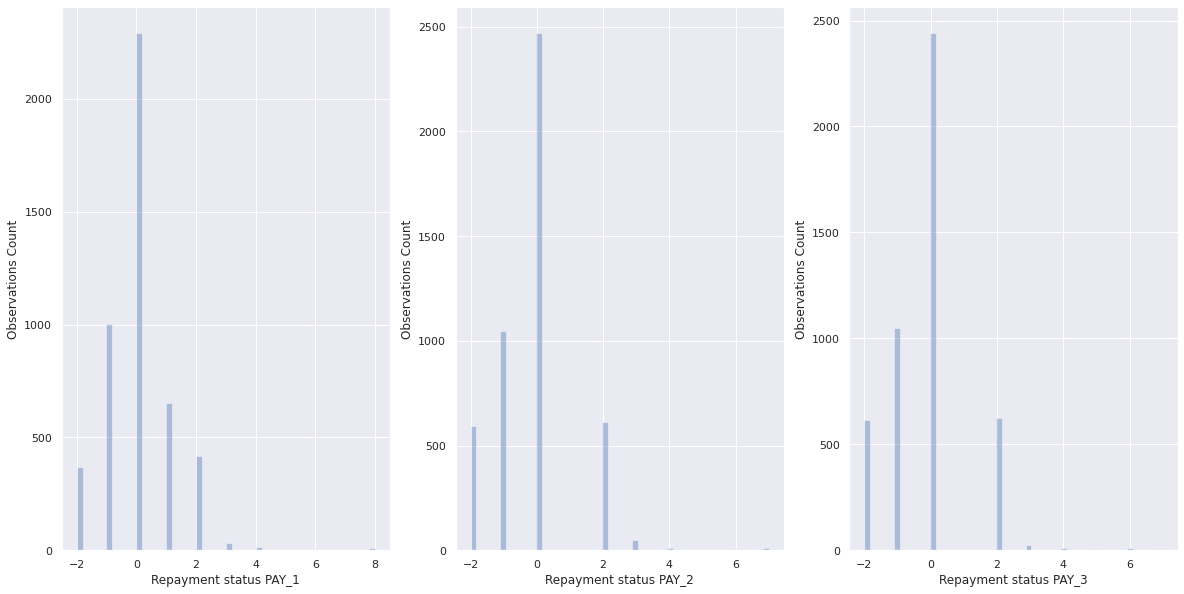

In [ ]:
fig, axs = plt.subplots(ncols=3)
pay_cols_names = [f"PAY_{x}" for x in range(1,7)]
pay_cols_names
sns.distplot(raw_data[pay_cols_names[0]],kde=False, ax=axs[0])
axs[0].set_ylabel("Observations Count")
axs[0].set_xlabel(f"Repayment status {pay_cols_names[0]}")

sns.distplot(raw_data[pay_cols_names[1]],kde=False, ax=axs[1])
axs[1].set_ylabel("Observations Count")
axs[1].set_xlabel(f"Repayment status {pay_cols_names[1]}")

sns.distplot(raw_data[pay_cols_names[2]],kde=False, ax=axs[2])
axs[2].set_ylabel("Observations Count")
axs[2].set_xlabel(f"Repayment status {pay_cols_names[2]}")





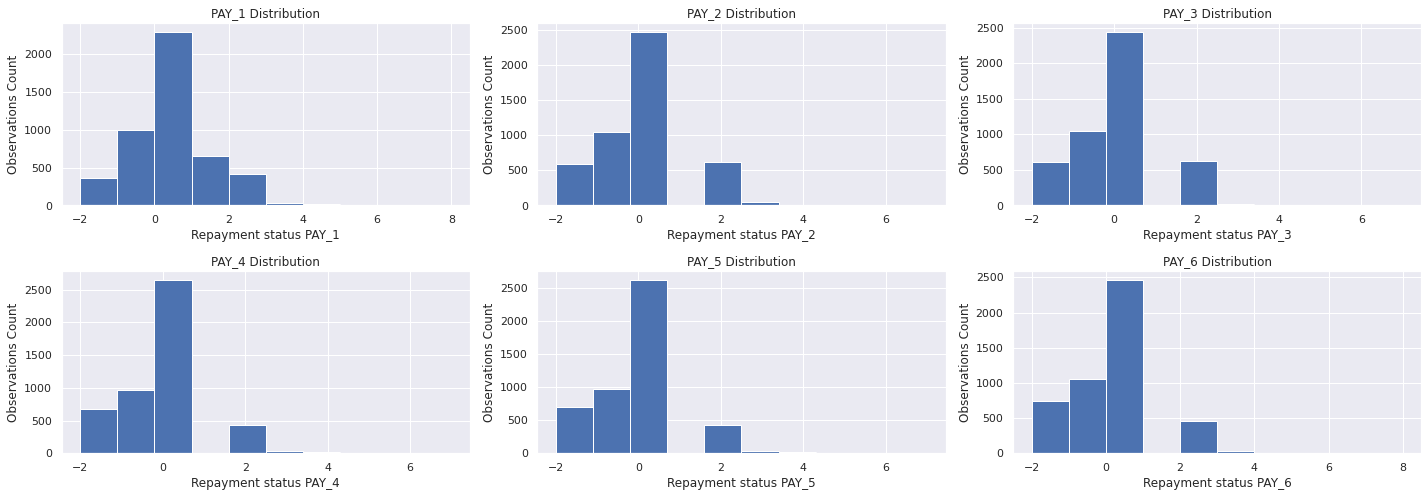

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax)
        ax.set_title(var_name+" Distribution")
        ax.set_ylabel("Observations Count")
        ax.set_xlabel(f"Repayment status {var_name}")

    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


draw_histograms(raw_data, pay_cols_names, 3, 3)


In [ ]:
#PAY_X observation:** negative numbers to -2 (assumption of pre-payment) up to +8 (default)   
#High cross correlation between PAY_X variables - recommend to summarize PAY_X
pay_cols_names =  ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','DEFAULT']
pay_cols_names
PAY_X_correlation = raw_data[pay_cols_names].corr(method="pearson")
PAY_X_correlation["DEFAULT"] 


PAY_1      0.290499
PAY_2      0.215329
PAY_3      0.196013
PAY_4      0.170002
PAY_5      0.169023
PAY_6      0.134524
DEFAULT    1.000000
Name: DEFAULT, dtype: float64

In [ ]:

##PAY_X recommended transformation** create **$PAY_X_Sum_6mo** variable
pay_cols =['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
raw_data["PAY_X_Sum_6mo"] = raw_data[pay_cols].sum(axis=1)
raw_data["PAY_X_Sum_6mo"] 
raw_data["PAY_X_Sum_6mo"].describe()

count    4798.000000
mean       -1.111505
std         5.909775
min       -12.000000
25%        -5.000000
50%         0.000000
75%         0.000000
max        33.000000
Name: PAY_X_Sum_6mo, dtype: float64

In [ ]:
#PAY_X_Sum_6mo - recommended transformation** Dummy variables if PAY_X_sum is below 0 or above 5   
#Leave out > 0 to <=5 as cross correlation would render this variable irrelevant.
# bin the Sum as recommended and check correlation
def my_recode11(series):
  if series <=0:
    return 1
  else:
   return 0

def my_recode12(series):
  if series > 5:
    return 1
  else:
   return 0

# raw_data["PAY_X_Sum_6mo"]
raw_data["PAY_X_Sum_6mo_belowZero"] = raw_data["PAY_X_Sum_6mo"].apply(my_recode11)
raw_data["PAY_X_Sum_6mo_aboveFive"] = raw_data["PAY_X_Sum_6mo"].apply(my_recode12)
raw_data[['PAY_X_Sum_6mo_belowZero', "PAY_X_Sum_6mo_aboveFive"]].describe()
# raw_data.head()

,PAY_X_Sum_6mo_belowZero,PAY_X_Sum_6mo_aboveFive
count,4798.000000,4798.000000
mean,0.765736,0.106711
std,0.423582,0.308778
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [ ]:
#PAY_X_Sum_6mo - observation:** binning PAY_X_Sum as per WOE maximizes correlation variance   
# check correlation of PAY_X Sum Variable
PAY_X_correlation2 = raw_data[['PAY_X_Sum_6mo_belowZero','PAY_X_Sum_6mo_aboveFive','DEFAULT']].corr(method="pearson")
PAY_X_correlation2

,PAY_X_Sum_6mo_belowZero,PAY_X_Sum_6mo_aboveFive,DEFAULT
PAY_X_Sum_6mo_belowZero,1.000000,-0.624878,-0.298105
PAY_X_Sum_6mo_aboveFive,-0.624878,1.000000,0.295656
DEFAULT,-0.298105,0.295656,1.000000


In [ ]:
raw_data.iloc[:,13:16 ].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3
count,4798.000000,4798.000000,4798.000000
mean,50097.492705,48078.066278,45125.477907
std,74838.747738,72316.794109,68045.386428
min,-14386.000000,-30000.000000,-15000.000000
25%,3154.250000,2936.750000,2400.000000
50%,21048.500000,20398.000000,19386.000000
75%,62587.250000,60262.750000,56255.250000
max,964511.000000,983931.000000,578971.000000


In [ ]:
raw_data.iloc[:,16:19 ].describe()

,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,4798.000000,4798.000000,4798.000000
mean,40636.279908,39377.431430,37850.983326
std,64180.237958,61694.144867,61624.087061
min,-170000.000000,-28335.000000,-339603.000000
25%,1739.250000,1473.000000,936.000000
50%,17886.500000,17163.000000,15564.500000
75%,49070.750000,48809.750000,47519.000000
max,891586.000000,927171.000000,961664.000000


In [ ]:
#BILL_AmtX - Histogram**
# Getting BILL_AMT1..6 columns only
bill_raw_data = raw_data.iloc[:,13:19]  
# bill_raw_data
bill_raw_data.quantile([.1,.75], axis = 0)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.10,181.60,0.00,0.00,0.00,0.00,0.0
0.75,62587.25,60262.75,56255.25,49070.75,48809.75,47519.0


In [ ]:
# dealing with outliers using IQR technique
Q1 = bill_raw_data.quantile(0.25)
Q3 = bill_raw_data.quantile(0.75)
IQR = Q3- Q1
print(IQR) 
# removing outlier 
bill_raw_data = bill_raw_data[~((bill_raw_data < (Q1-1.5 * IQR)) |(bill_raw_data > (Q3 + 1.5 * IQR))).any(axis=1)]


BILL_AMT1    59433.00
BILL_AMT2    57326.00
BILL_AMT3    53855.25
BILL_AMT4    47331.50
BILL_AMT5    47336.75
BILL_AMT6    46583.00
dtype: float64


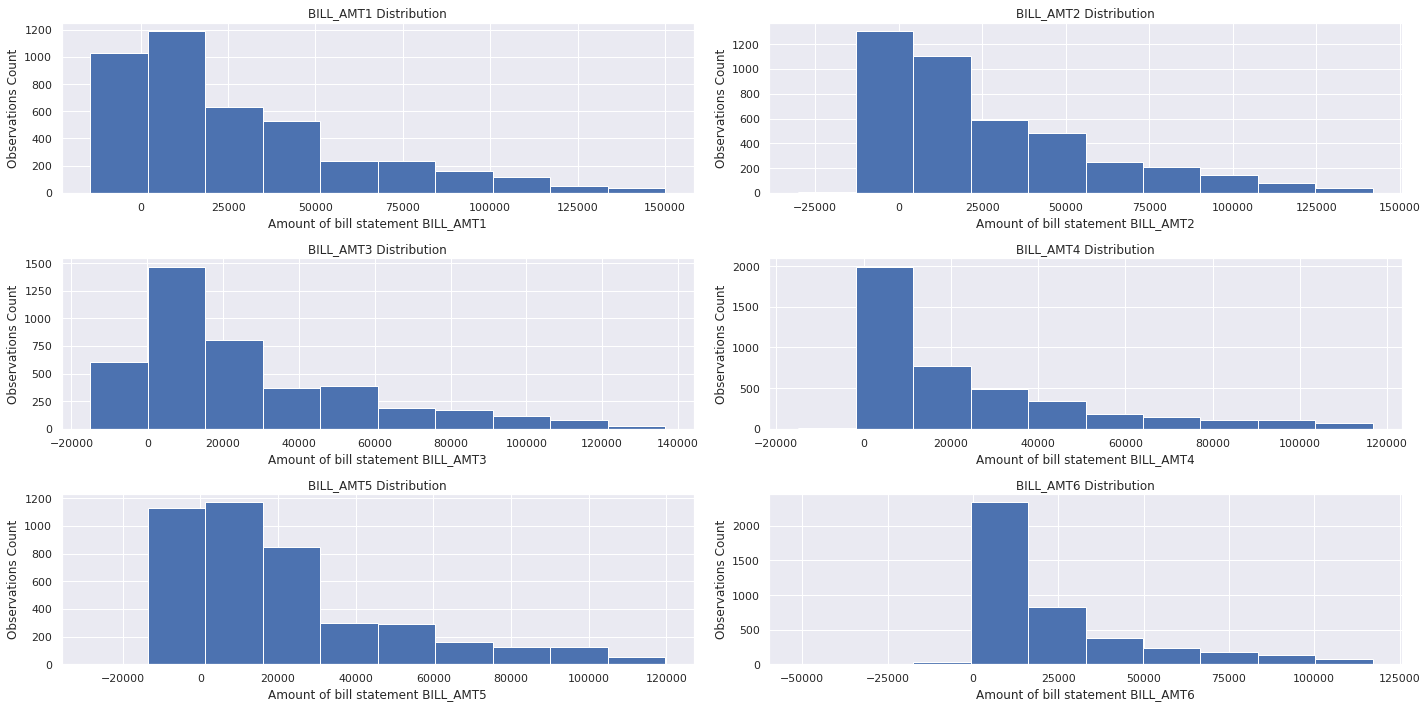

In [ ]:
# multiple plots
bill_cols=list(bill_raw_data.columns)
def draw_histograms2(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax)
        ax.set_title(var_name+" Distribution")
        ax.set_ylabel("Observations Count")
        ax.set_xlabel(f"Amount of bill statement {var_name}")

    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms2(bill_raw_data, bill_cols, 3, 2)



In [ ]:
#BILL_AmtX - observation** ...  
#High cross correlation between BILL_X variables - recommend to summarize BILL_X
# check correlation of BILL_X Sum Variable
BILL_X_correlation = raw_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','DEFAULT']].corr(method="pearson")

BILL_X_correlation.iloc[: , 6]

BILL_AMT1   -0.009343
BILL_AMT2   -0.005152
BILL_AMT3   -0.004301
BILL_AMT4    0.000319
BILL_AMT5   -0.003478
BILL_AMT6   -0.002265
DEFAULT      1.000000
Name: DEFAULT, dtype: float64

In [ ]:
#**BILL_AmtX - recommended transformation** develop variable to capture bill/pay ratio

# option 1: sum of all bill values
raw_data["BILL_SUM"] = raw_data[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].sum(axis=1)
# # option 2: average bill amt
raw_data["Avg_Bill_Amt"] = raw_data["BILL_SUM"]/6
# # option 3: max bill over 6 months
raw_data["Max_Bill_Amt"] = raw_data[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].max(axis=1)
raw_data["Max_Bill_Amt_Sq"] = raw_data["Max_Bill_Amt"]**2
raw_data["Max_Bill_Amt_Sqrt"] = raw_data["Max_Bill_Amt"]**(1/2)
raw_data["Max_Bill_Amt_Log"] = np.log(raw_data["Max_Bill_Amt"])
raw_data
# np.log(7704)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,u,train,test,validate,data.group,LIMIT_BAL_below_30k,LIMIT_BAL_above_160k,SEX_FEMALE,Married_Y,ED_Grad_other,AGE_below_25,AGE_25to35,AGE_above_40,PAY_X_Sum_6mo,PAY_X_Sum_6mo_belowZero,PAY_X_Sum_6mo_aboveFive,BILL_SUM,Avg_Bill_Amt,Max_Bill_Amt,Max_Bill_Amt_Sq,Max_Bill_Amt_Sqrt,Max_Bill_Amt_Log
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1.0,0.287578,1.0,0.0,0.0,1.0,1,0,1,1,0,1,1,0,-2,1,0,7704,1284.000000,3913,15311569,62.553977,8.272060
1,2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1.0,0.788305,0.0,0.0,1.0,3.0,0,0,1,0,0,0,1,0,3,0,0,17077,2846.166667,3455,11937025,58.779248,8.147578
2,3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0.0,0.408977,1.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,1,0,101653,16942.166667,29239,854919121,170.994152,10.283259
3,4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0.0,0.883017,0.0,0.0,1.0,3.0,0,0,1,1,0,0,1,0,0,1,0,231334,38555.666667,49291,2429602681,222.015765,10.805497
4,5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0.0,0.940467,0.0,0.0,1.0,3.0,0,0,0,1,0,0,1,1,-2,1,0,109339,18223.166667,35835,1284147225,189.301347,10.486680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,4794,4794,250000,1,1,2,44,0,0,0,0,0,0,98727,102134,106434,107673,109780,113961,5000,6000,4500,4000,6000,4500,0.0,0.517722,0.0,1.0,0.0,2.0,0,1,0,0,1,0,1,1,0,1,0,638709,106451.500000,113961,12987109521,337.581101,11.643612
4794,4795,4795,230000,2,2,2,25,0,0,0,0,-1,0,19225,16375,11864,10004,62349,52791,2000,2000,5000,65349,2000,2000,0.0,0.923285,0.0,0.0,1.0,3.0,0,1,1,0,0,1,1,0,-1,1,0,172608,28768.000000,62349,3887397801,249.697817,11.040503
4795,4796,4796,20000,1,3,1,40,0,0,0,0,0,0,20167,37198,17858,16400,14711,18691,1308,2466,555,583,4275,973,0.0,0.014459,1.0,0.0,0.0,1.0,1,0,0,1,0,0,1,0,0,1,0,125025,20837.500000,37198,1383691204,192.867830,10.524010
4796,4797,4797,80000,2,2,1,41,0,0,0,0,0,0,21709,22432,23693,24089,24832,25269,1378,1639,1089,1132,1000,1100,0.0,0.916286,0.0,0.0,1.0,3.0,0,0,1,1,0,0,1,1,0,1,0,142024,23670.666667,25269,638522361,158.962260,10.137334


In [ ]:
#BILL_X - analyze most highly correlated variable type**
# check correlation of BILL_X Sum Variable

BILL_X_correlation = raw_data[['BILL_SUM','Avg_Bill_Amt',
                                      'Max_Bill_Amt','Max_Bill_Amt_Sq',
                                      'DEFAULT']].corr(method="pearson")
BILL_X_correlation.iloc[:,4]

BILL_SUM          -0.004402
Avg_Bill_Amt      -0.004402
Max_Bill_Amt      -0.029271
Max_Bill_Amt_Sq   -0.007027
DEFAULT            1.000000
Name: DEFAULT, dtype: float64

In [ ]:
#**Max_Bill_Amt - Histogram**

Max_bill_df = raw_data[['ID','Max_Bill_Amt']]

Max_bill_df["Max_Bill_Amt"].describe()

count      4798.000000
mean      58737.761776
std       78796.741390
min       -2000.000000
25%        9918.750000
50%       30519.000000
75%       74760.500000
max      983931.000000
Name: Max_Bill_Amt, dtype: float64

In [ ]:
## **Max_Bill_Amt - bin analysis** - investigate binning options for variable split


# check WOE recommended binning and correlation in PAY_X



In [ ]:
#Max_Bill_Amt - recommended transformation** Create bins for Max_Bill variable as per WOE max  
#Leave out > 21k & <= 52k as cross correlation would render this variable irrelevant.   
# bin the Sum as recommended and check correlation
def my_recode13(series):
  if series <= 600:
    return 1
  else:
    return 0
def my_recode14(series):
  if (series > 600) | (series <= 4000):
    return 1
  else:
    return 0

def my_recode15(series):
  if (series > 4000) | (series <= 18400):
    return 1
  else:
    return 0

def my_recode16(series):
  if (series > 18400) | (series <= 21000):
    return 1
  else:
    return 0

def my_recode17(series):
  if (series > 52000):
    return 1
  else:
    return 0


raw_data["Max_Bill_Amt_below_600"] = raw_data["Max_Bill_Amt"].apply(my_recode13)
raw_data["Max_Bill_Amt_below_4k"] = raw_data["Max_Bill_Amt"].apply(my_recode14)
raw_data["Max_Bill_Amt_below_18k"] = raw_data["Max_Bill_Amt"].apply(my_recode15)
raw_data["Max_Bill_Amt_below_21k"] = raw_data["Max_Bill_Amt"].apply(my_recode16)
raw_data["Max_Bill_Amt_above_52k"] = raw_data["Max_Bill_Amt"].apply(my_recode17)

raw_data[['Max_Bill_Amt_below_600','Max_Bill_Amt_below_4k',
                   'Max_Bill_Amt_below_18k','Max_Bill_Amt_below_21k',
                   'Max_Bill_Amt_above_52k']]


,Max_Bill_Amt_below_600,Max_Bill_Amt_below_4k,Max_Bill_Amt_below_18k,Max_Bill_Amt_below_21k,Max_Bill_Amt_above_52k
0,0,1,1,1,0
1,0,1,1,1,0
2,0,1,1,1,0
3,0,1,1,1,0
4,0,1,1,1,0
...,...,...,...,...,...
4793,0,1,1,1,1
4794,0,1,1,1,1
4795,0,1,1,1,0
4796,0,1,1,1,0


In [ ]:
#**Max_Bill_Amt - Histogram**
Max_bill_df = raw_data[['ID','Max_Bill_Amt']]
Max_bill_df["Max_Bill_Amt"].describe()


count      4798.000000
mean      58737.761776
std       78796.741390
min       -2000.000000
25%        9918.750000
50%       30519.000000
75%       74760.500000
max      983931.000000
Name: Max_Bill_Amt, dtype: float64

In [ ]:
#**Max_Bill_Amt - observation:** binning PAY_X_Sum as per WOE maximizes correlation variance   
# check correlation of PAY_X Sum Variable
Max_Bill_correlation = raw_data[['Max_Bill_Amt_below_600','Max_Bill_Amt_below_4k','Max_Bill_Amt_below_18k','Max_Bill_Amt_below_21k','Max_Bill_Amt_above_52k','DEFAULT']].corr()


Max_Bill_correlation

,Max_Bill_Amt_below_600,Max_Bill_Amt_below_4k,Max_Bill_Amt_below_18k,Max_Bill_Amt_below_21k,Max_Bill_Amt_above_52k,DEFAULT
Max_Bill_Amt_below_600,1.000000,NaN,NaN,NaN,-0.170313,0.068635
Max_Bill_Amt_below_4k,NaN,NaN,NaN,NaN,NaN,NaN
Max_Bill_Amt_below_18k,NaN,NaN,NaN,NaN,NaN,NaN
Max_Bill_Amt_below_21k,NaN,NaN,NaN,NaN,NaN,NaN
Max_Bill_Amt_above_52k,-0.170313,NaN,NaN,NaN,1.000000,-0.054055
DEFAULT,0.068635,NaN,NaN,NaN,-0.054055,1.000000


In [ ]:
#**Binning for regression analysis - in case of tree analysis, continuous variable recommended.** 

## Explore & Transform - PAY_AMTX
#**data description:** the amount Paid against prior Bill (x-1) for 6 months April (1) to September (6)   

raw_data.iloc[:,19:22].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3
count,4798.000000,4798.000000,4798.000000
mean,5516.825135,5395.170696,4637.476865
std,14690.042037,15959.798110,18292.368245
min,0.000000,0.000000,0.000000
25%,1000.000000,600.000000,210.000000
50%,2123.000000,2000.000000,1400.000000
75%,5001.000000,5000.000000,4000.000000
max,368199.000000,344261.000000,896040.000000


In [ ]:
raw_data.iloc[:,22:25].describe()

,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,4798.000000,4798.000000,4798.000000
mean,4746.893497,4774.770738,5193.080659
std,15204.479864,14941.326980,19073.566300
min,0.000000,0.000000,0.000000
25%,216.500000,200.000000,0.000000
50%,1500.000000,1500.000000,1300.500000
75%,4000.000000,4000.000000,4000.000000
max,497000.000000,332000.000000,528666.000000


In [ ]:

#PAY_AMTX - Histogram**
# Getting PAY_AMTX1..6 columns only
pay_amt = raw_data.iloc[:, 19:25]
Q1 = pay_amt.quantile(0.25)
Q3 = pay_amt.quantile(0.5)
IQR = Q3-Q1
print(IQR)
# removing outlier 
pay_amt = pay_amt[~((pay_amt < (Q1-1.5 * IQR)) |(pay_amt > (Q3 + 1.5 * IQR))).any(axis=1)]

PAY_AMT1    1123.0
PAY_AMT2    1400.0
PAY_AMT3    1190.0
PAY_AMT4    1283.5
PAY_AMT5    1300.0
PAY_AMT6    1300.5
dtype: float64


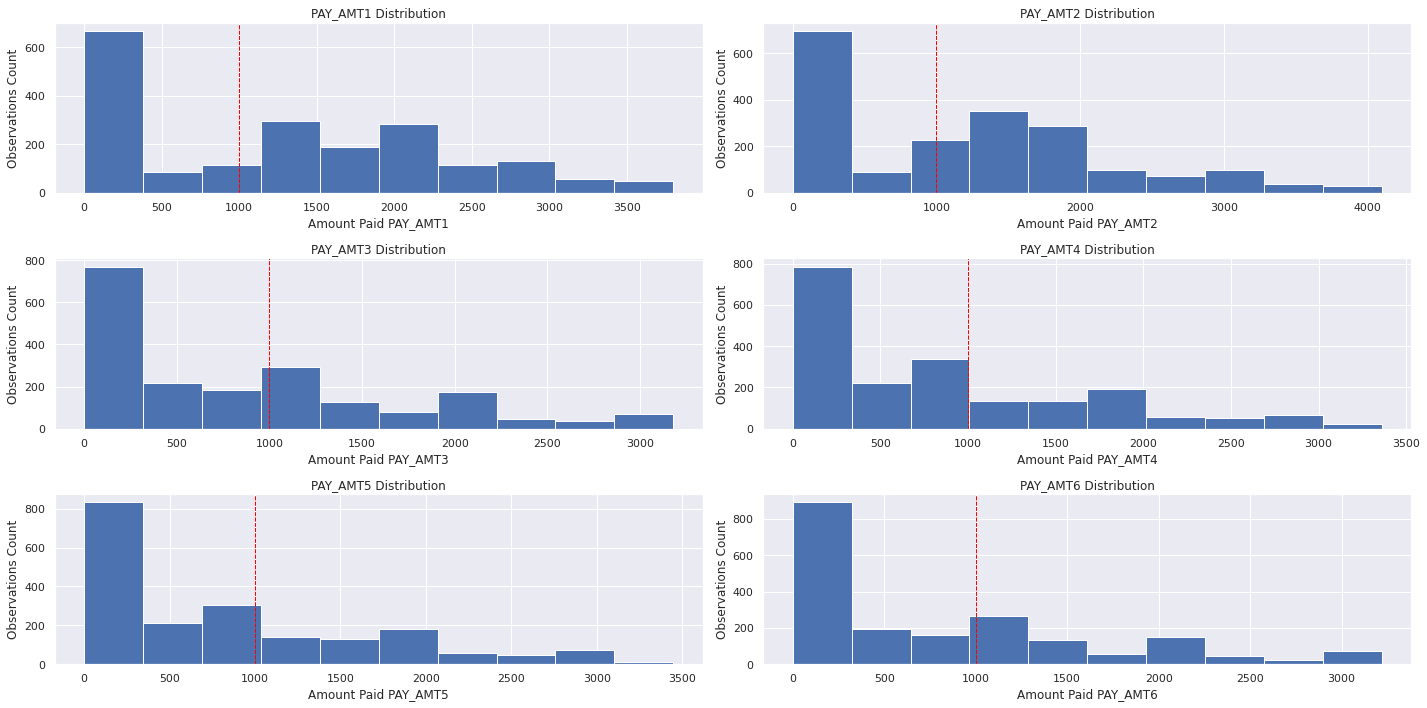

In [ ]:
pay_amt # multiple plots
pay_cols=list(pay_amt.columns)
def draw_histograms3(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax)
        ax.set_title(var_name+" Distribution")
        ax.set_ylabel("Observations Count")
        plt.axvline(1000, color='red', linestyle='dashed', linewidth=1)
        plt.axvline(1000, color='red', linestyle='dashed', linewidth=1)
        ax.set_xlabel(f"Amount Paid {var_name}")

    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms3(pay_amt, pay_cols, 3, 2)



In [ ]:

#PAY_AMTX - observation:** ...  
#High cross correlation between BILL_X variables - recommend to summarize BILL_X
# check correlation of BILL_X Sum Variable
PAY_AMTX_correlation = raw_data[['PAY_AMT1','PAY_AMT2',
            'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','DEFAULT']].corr()

PAY_AMTX_correlation["DEFAULT"]

PAY_AMT1   -0.081016
PAY_AMT2   -0.081930
PAY_AMT3   -0.037670
PAY_AMT4   -0.065548
PAY_AMT5   -0.040124
PAY_AMT6   -0.047141
DEFAULT     1.000000
Name: DEFAULT, dtype: float64

In [ ]:
#PAY_AMTX - recommended transformation** develop variable to capture pay ratio
# option 1: sum of all bill values

raw_data["PMT_SUM"] = raw_data[["PAY_AMT1","PAY_AMT2",
                                  "PAY_AMT3","PAY_AMT4",
                                  "PAY_AMT5","PAY_AMT6"]].sum(axis=1)
# option 2: average bill amt
raw_data["Avg_Pmt_Amt"] = raw_data["PMT_SUM"]/6
# option 3: max bill over 6 months
## Create column Max_Bill_Amt ##
raw_data["Max_Pmt_Amt"] =  raw_data[["PAY_AMT1","PAY_AMT2",
                                  "PAY_AMT3","PAY_AMT4",
                                  "PAY_AMT5","PAY_AMT6"]].max(axis=1)
raw_data



,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,u,train,test,validate,data.group,LIMIT_BAL_below_30k,LIMIT_BAL_above_160k,SEX_FEMALE,Married_Y,ED_Grad_other,AGE_below_25,AGE_25to35,AGE_above_40,PAY_X_Sum_6mo,PAY_X_Sum_6mo_belowZero,PAY_X_Sum_6mo_aboveFive,BILL_SUM,Avg_Bill_Amt,Max_Bill_Amt,Max_Bill_Amt_Sq,Max_Bill_Amt_Sqrt,Max_Bill_Amt_Log,Max_Bill_Amt_below_600,Max_Bill_Amt_below_4k,Max_Bill_Amt_below_18k,Max_Bill_Amt_below_21k,Max_Bill_Amt_above_52k,PMT_SUM,Avg_Pmt_Amt,Max_Pmt_Amt
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1.0,0.287578,1.0,0.0,0.0,1.0,1,0,1,1,0,1,1,0,-2,1,0,7704,1284.000000,3913,15311569,62.553977,8.272060,0,1,1,1,0,689,114.833333,689
1,2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1.0,0.788305,0.0,0.0,1.0,3.0,0,0,1,0,0,0,1,0,3,0,0,17077,2846.166667,3455,11937025,58.779248,8.147578,0,1,1,1,0,5000,833.333333,2000
2,3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0.0,0.408977,1.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,1,0,101653,16942.166667,29239,854919121,170.994152,10.283259,0,1,1,1,0,11018,1836.333333,5000
3,4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0.0,0.883017,0.0,0.0,1.0,3.0,0,0,1,1,0,0,1,0,0,1,0,231334,38555.666667,49291,2429602681,222.015765,10.805497,0,1,1,1,0,8388,1398.000000,2019
4,5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0.0,0.940467,0.0,0.0,1.0,3.0,0,0,0,1,0,0,1,1,-2,1,0,109339,18223.166667,35835,1284147225,189.301347,10.486680,0,1,1,1,0,59049,9841.500000,36681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,4794,4794,250000,1,1,2,44,0,0,0,0,0,0,98727,102134,106434,107673,109780,113961,5000,6000,4500,4000,6000,4500,0.0,0.517722,0.0,1.0,0.0,2.0,0,1,0,0,1,0,1,1,0,1,0,638709,106451.500000,113961,12987109521,337.581101,11.643612,0,1,1,1,1,30000,5000.000000,6000
4794,4795,4795,230000,2,2,2,25,0,0,0,0,-1,0,19225,16375,11864,10004,62349,52791,2000,2000,5000,65349,2000,2000,0.0,0.923285,0.0,0.0,1.0,3.0,0,1,1,0,0,1,1,0,-1,1,0,172608,28768.000000,62349,3887397801,249.697817,11.040503,0,1,1,1,1,78349,13058.166667,65349
4795,4796,4796,20000,1,3,1,40,0,0,0,0,0,0,20167,37198,17858,16400,14711,18691,1308,2466,555,583,4275,973,0.0,0.014459,1.0,0.0,0.0,1.0,1,0,0,1,0,0,1,0,0,1,0,125025,20837.500000,37198,1383691204,192.867830,10.524010,0,1,1,1,0,10160,1693.333333,4275
4796,4797,4797,80000,2,2,1,41,0,0,0,0,0,0,21709,22432,23693,24089,24832,25269,1378,1639,1089,1132,1000,1100,0.0,0.916286,0.0,0.0,1.0,3.0,0,0,1,1,0,0,1,1,0,1,0,142024,23670.666667,25269,638522361,158.962260,10.137334,0,1,1,1,0,7338,1223.000000,1639


In [ ]:
#**Avg_Pmt_Amt - Histogram**

Avg_Pmt_df = raw_data[['ID','Avg_Pmt_Amt']]
Avg_Pmt_df["Avg_Pmt_Amt"].describe()

count      4798.000000
mean       5044.036265
std        9076.259847
min           0.000000
25%        1050.000000
50%        2285.500000
75%        5359.166667
max      191300.500000
Name: Avg_Pmt_Amt, dtype: float64

In [ ]:
#Avg_Pmt_Amt - bin analysis** - investigate binning options for variable split
# check WOE recommended binning and correlation in PAY_X


In [ ]:
#Avg_Pmt_Amt - recommended transformation** Create bins for Avg_Pmt variable as per WOE max  
#Leave out > 2k & <= 12k as cross correlation would render this variable irrelevant.   
# bin the Sum as recommended and check correlation

In [ ]:
#Avg_Pmt_Amt - recommended transformation** Create bins for Avg_Pmt variable as per WOE max  
#Leave out > 2k & <= 12k as cross correlation would render this variable irrelevant.   
# bin the Sum as recommended and check correlation
def my_recode15(series):
  if series <= 2045:
    return 1
  else:
    return 0

def my_recode16(series):
  if series > 12000:
    return 1
  else:
    return 0

raw_data["Avg_Pmt_Amt_below2k"] = raw_data["Avg_Pmt_Amt"].apply(my_recode15)
raw_data["Avg_Pmt_Amt_above12k"] = raw_data["Avg_Pmt_Amt"].apply(my_recode16)

raw_data[['Avg_Pmt_Amt_below2k','Avg_Pmt_Amt_above12k']].describe()


,Avg_Pmt_Amt_below2k,Avg_Pmt_Amt_above12k
count,4798.000000,4798.000000
mean,0.467695,0.096290
std,0.499007,0.295019
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [ ]:
#**Avg_Pmt_Amt - observation:** binning PAY_X_Sum as per WOE maximizes correlation variance   

# check correlation of PAY_X Sum Variable
Avg_Pmt_correlation = raw_data[['Avg_Pmt_Amt_below2k','Avg_Pmt_Amt_above12k','DEFAULT']].corr()

Avg_Pmt_correlation 

,Avg_Pmt_Amt_below2k,Avg_Pmt_Amt_above12k,DEFAULT
Avg_Pmt_Amt_below2k,1.000000,-0.305969,0.136799
Avg_Pmt_Amt_above12k,-0.305969,1.000000,-0.093954
DEFAULT,0.136799,-0.093954,1.000000


In [ ]:
## Create new variable: Avg_Util
#Avg_Util - data description**  amount of balance limit used (BILL_AMTX/LIMIT_BAL)

raw_data["Util_Bill_1"] = raw_data["BILL_AMT1"] / raw_data["LIMIT_BAL"]
raw_data["Util_Bill_2"] = raw_data["BILL_AMT2"] / raw_data["LIMIT_BAL"]
raw_data["Util_Bill_3"] = raw_data["BILL_AMT3"] / raw_data["LIMIT_BAL"]
raw_data["Util_Bill_4"] = raw_data["BILL_AMT4"] / raw_data["LIMIT_BAL"]
raw_data["Util_Bill_5"] = raw_data["BILL_AMT5"] / raw_data["LIMIT_BAL"]
raw_data["Util_Bill_6"] = raw_data["BILL_AMT6"] /raw_data["LIMIT_BAL"]

raw_data["Util_SUM"] = raw_data[["Util_Bill_1", "Util_Bill_2", "Util_Bill_3", "Util_Bill_4", "Util_Bill_5", "Util_Bill_6"]].sum(axis=1)

raw_data['Avg_Util'] = raw_data["Util_SUM"]/6
raw_data["Avg_Util"].describe()


count    4798.000000
mean        0.361268
std         0.352217
min        -0.200154
25%         0.028771
50%         0.261351
75%         0.659789
max         5.364308
Name: Avg_Util, dtype: float64

In [ ]:
#**Avg_Util - Histogram**
# Getting ID and Avg_Util columns only

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 103 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


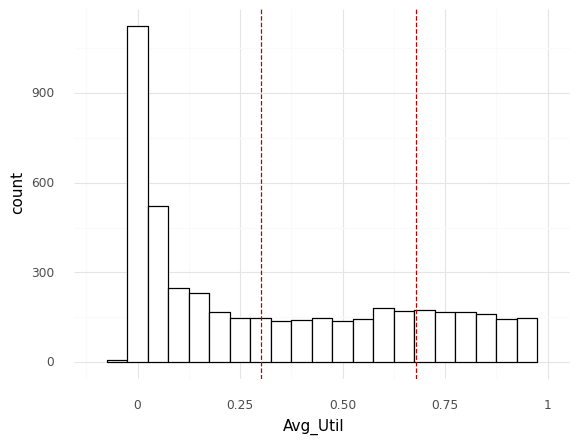

<ggplot: (-9223363265673530140)>

In [ ]:
from plotnine import *
# Generating a histogram for the LIMIT_BAL variable with a vertical cutoff line

# Avg_Util_df = raw_data['Avg_Util']
# sns.distplot(Avg_Util_df, kde=False )
# plt.axvline(0.3, color='red', linestyle='dashed', linewidth=1)
# plt.axvline(0.68, color='red', linestyle='dashed', linewidth=1)
# plt.xlim([-0.1,1])

ggplot(data = raw_data, mapping=aes(x = raw_data['Avg_Util'])) + geom_histogram(binwidth = .05,colour = "black", fill = "white"
) + geom_vline(aes(xintercept = 0.3), colour = "#BB0000", linetype = "dashed"
) + geom_vline(aes(xintercept =0.68),colour = "#BB0000", linetype = "dashed") + theme_minimal() + xlim(-0.1,1) + xlab("Avg_Util")

In [ ]:
#**Avg_Util - bin analysis** - investigate binning options for variable split
# check WOE recommended binning and correlation in PAY_X
Avg_Util_bins = raw_data[["Avg_Util","DEFAULT"]]
Avg_Util_bin=woeBinningPandas.woe_binning(Avg_Util_bins,"DEFAULT","Avg_Util", 0.05, 0, 0.1, 50, 'DEFAULT')

# bins results
Avg_Util_bin

/usr/local/lib/python3.6/dist-packages/woeBinningPandas/__init__.py:512: UserWarning: Incorrect specification of data frame and/or variables.
  warnings.warn("Incorrect specification of data frame and/or variables.")
/usr/local/lib/python3.6/dist-packages/woeBinningPandas/__init__.py:544: UserWarning: Incorrect variable specification.
Target variable must have two distinct values (NAs are accepted).
  warnings.warn("Incorrect variable specification.\nTarget variable must have two distinct values (NAs are accepted).")


,woe,cutpoints_final,upper_cutpoints_final_dfrm,iv_total_final,good,bad,col_perc_a,col_perc_b,iv_bins
predictor_var_binned,,,,,,,,,
"(-inf, 0.0007292222222]",67.619835,-inf,0.000729222,0.112994,86,154,0.081056,0.041221,0.026936
"(0.0007292222222, 0.003593030303]",16.019137,0.000729,0.00359303,0.112994,60,180,0.056550,0.048180,0.001341
"(0.003593030303, 0.4287496879]",-35.263726,0.003593,0.42875,0.112994,399,1999,0.376060,0.535064,0.056071
"(0.4287496879, inf]",25.854235,0.428750,inf,0.112994,516,1403,0.486334,0.375535,0.028646
Missing,NaN,inf,Missing,0.112994,0,0,0.000000,0.000000,NaN


In [ ]:

#**Avg_Util - recommended transformation** Create bins for Avg_Util variable as per WOE max  
#Leave out > .001 & <= .45 as cross correlation would render this variable irrelevant.   
def recode1(series):
  if series <= .001:
    return 1
  else:
    return 0

def recode2(series):
  if series <= .45:
    return 1
  else:
    return 0



raw_data['Avg_Util_below_.001'] = raw_data['Avg_Util'].apply(recode1)
raw_data["Avg_Util_above_.45"] = raw_data['Avg_Util'].apply(recode2)
raw_data[['Avg_Util_below_.001','Avg_Util_above_.45']].describe()



,Avg_Util_below_.001,Avg_Util_above_.45
count,4798.000000,4798.000000
mean,0.053564,0.611922
std,0.225179,0.487363
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [ ]:
## Create new variable: Avg_Pay_Ratio
#**Avg_Pay_Ratio - data description**  amount paid against bill (BILL_AMTX+1/PAY_AMTX)

raw_data["Pay_Ratio_1"] =np.where(raw_data["BILL_AMT2"] > 0,(raw_data["PAY_AMT1"] / raw_data["BILL_AMT2"]) , 1)
raw_data["Pay_Ratio_2"] =np.where(raw_data["BILL_AMT3"] > 0,(raw_data["PAY_AMT2"] / raw_data["BILL_AMT3"]) , 1)
raw_data["Pay_Ratio_3"] =np.where(raw_data["BILL_AMT4"] > 0,(raw_data["PAY_AMT3"] / raw_data["BILL_AMT4"]) , 1)
raw_data["Pay_Ratio_4"] =np.where(raw_data["BILL_AMT5"] > 0,(raw_data["PAY_AMT4"] / raw_data["BILL_AMT5"]) , 1)
raw_data["Pay_Ratio_5"] =np.where(raw_data["BILL_AMT6"] > 0,(raw_data["PAY_AMT5"] / raw_data["BILL_AMT6"]) , 1)

raw_data["Ratio_SUM"] = raw_data[["Pay_Ratio_1","Pay_Ratio_2","Pay_Ratio_3","Pay_Ratio_4","Pay_Ratio_5"]].sum(axis=1)

raw_data["Avg_Pay_Ratio"] = raw_data["Ratio_SUM"]/5
raw_data["Avg_Pay_Ratio"].describe()

count    4798.000000
mean        1.040083
std        38.539019
min         0.000000
25%         0.048397
50%         0.221359
75%         0.945464
max      2667.199955
Name: Avg_Pay_Ratio, dtype: float64

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 64 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


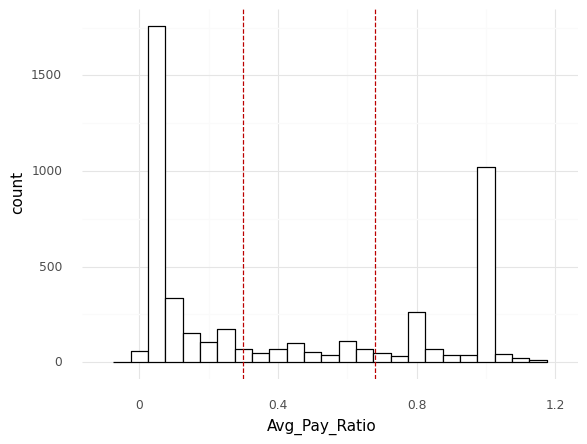

<ggplot: (-9223363265673358483)>

In [ ]:
#**Avg_Pay_Ratio - Histogram**
# Getting ID and Avg_Util columns only

# sns.distplot(raw_data['Avg_Pay_Ratio'], kde=False )
# # raw_data['Avg_Pay_Ratio'].hist()
# plt.axvline(0.3, color='red', linestyle='dashed', linewidth=1)
# plt.axvline(0.68, color='red', linestyle='dashed', linewidth=1)
# plt.xlim([-0.1,1.2])
ggplot(data = raw_data, mapping=aes(x = raw_data['Avg_Pay_Ratio'])) + geom_histogram(binwidth = .05,colour = "black", fill = "white"
) + geom_vline(aes(xintercept = 0.3), colour = "#BB0000", linetype = "dashed"
) + geom_vline(aes(xintercept =0.68),colour = "#BB0000", linetype = "dashed") + theme_minimal() + xlim(-0.1,1.2) + xlab("Avg_Pay_Ratio")


In [ ]:
#**Avg_Pay_Ratio - bin analysis** - investigate binning options for variable split
# check WOE recommended binning and correlation in PAY_X
Avg_Pay_Ratio_bins = raw_data[["Avg_Pay_Ratio","DEFAULT"]]
Avg_Pay_Ratio_bin=woeBinningPandas.woe_binning(Avg_Pay_Ratio_bins,"DEFAULT","Avg_Pay_Ratio", 0.05, 0, 0.1, 50, 'DEFAULT')

Avg_Pay_Ratio_bin

/usr/local/lib/python3.6/dist-packages/woeBinningPandas/__init__.py:512: UserWarning: Incorrect specification of data frame and/or variables.
  warnings.warn("Incorrect specification of data frame and/or variables.")
/usr/local/lib/python3.6/dist-packages/woeBinningPandas/__init__.py:544: UserWarning: Incorrect variable specification.
Target variable must have two distinct values (NAs are accepted).
  warnings.warn("Incorrect variable specification.\nTarget variable must have two distinct values (NAs are accepted).")


,woe,cutpoints_final,upper_cutpoints_final_dfrm,iv_total_final,good,bad,col_perc_a,col_perc_b,iv_bins
predictor_var_binned,,,,,,,,,
"(-inf, 0.03505538677]",93.945024,-inf,0.0350554,0.133867,101,139,0.095193,0.037206,0.054477
"(0.03505538677, 0.8019469613]",1.365311,0.035055,0.801947,0.133867,697,2421,0.656927,0.648019,0.000122
"(0.8019469613, 0.9456403957]",-76.557810,0.801947,0.94564,0.133867,28,212,0.026390,0.056745,0.023239
"(0.9456403957, 1.0]",17.898892,0.945640,1,0.133867,179,527,0.168709,0.141060,0.004949
"(1.0, inf]",-79.577784,1.000000,inf,0.133867,56,437,0.052780,0.116970,0.051081
Missing,NaN,inf,Missing,0.133867,0,0,0.000000,0.000000,NaN


In [ ]:
#**Avg_Pay_Ratio - recommended transformation** Create bins as per WOE max  
#Leave out > .113 & <= 1 as cross correlation would render this variable irrelevant.   
## split Avg_Pay_Ratio into 3 groups: <= .035, <= .113, <= 1, > 1
raw_data["Avg_Pay_Ratio_below_.035" ]= np.where(raw_data["Avg_Pay_Ratio"] <= .035,1,0)
raw_data["Avg_Pay_Ratio_above_.113"] = np.where((raw_data["Avg_Pay_Ratio"]  > .035) |
                                              (raw_data["Avg_Pay_Ratio"]  <= .113),1,0)
raw_data['Avg_Pay_Ratio_above_1'] = np.where(raw_data["Avg_Pay_Ratio"]  > 1,1,0)
raw_data[['Avg_Pay_Ratio_below_.035','Avg_Pay_Ratio_above_.113','Avg_Pay_Ratio_above_1']].describe()


,Avg_Pay_Ratio_below_.035,Avg_Pay_Ratio_above_.113,Avg_Pay_Ratio_above_1
count,4798.000000,4798.0,4798.000000
mean,0.049604,1.0,0.102751
std,0.217148,0.0,0.303665
min,0.000000,1.0,0.000000
25%,0.000000,1.0,0.000000
50%,0.000000,1.0,0.000000
75%,0.000000,1.0,0.000000
max,1.000000,1.0,1.000000


In [ ]:
## Create new variable: Max_DLQ
##**Max_DLQ - data description**  max value in PAY_X variables across period
## Create column Max_DLQ ##

raw_data["Max_DLQa"] = raw_data[["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].max(axis=1)
raw_data["Max_DLQ"] = np.where(raw_data["Max_DLQa"] <= 0,0,raw_data["Max_DLQa"])
raw_data["Max_DLQ"].describe()

count    4798.000000
mean        0.696540
std         1.092755
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         8.000000
Name: Max_DLQ, dtype: float64

In [ ]:
DLQ_summary = raw_data['Max_DLQ'].value_counts()
DLQ_table = pd.DataFrame(DLQ_summary).reset_index()
DLQ_table.columns = ['Max_DLQ','Freq']
DLQ_table["PCT"] = DLQ_table['Freq']/30000
DLQ_table["PCT"] = DLQ_table["PCT"].apply(my_recode5)
DLQ_table

,Max_DLQ,Freq,PCT
0,0,3126,10.4 %
1,2,1146,3.8 %
2,1,343,1.1 %
3,3,116,0.4 %
4,4,33,0.1 %
5,7,10,0.0 %
6,8,10,0.0 %
7,6,7,0.0 %
8,5,7,0.0 %


In [ ]:
#**Max_DLQ - bin analysis** - investigate binning options for variable split
# check WOE recommended binning and correlation in PAY_X
Max_DLQ_bins = raw_data[["Max_DLQ","DEFAULT"]]
Max_DLQ_bin = woeBinningPandas.woe_binning(Max_DLQ_bins,"DEFAULT","Max_DLQ", 0.05, 0, 0.1, 50, 'DEFAULT')

Max_DLQ_bin 


/usr/local/lib/python3.6/dist-packages/woeBinningPandas/__init__.py:512: UserWarning: Incorrect specification of data frame and/or variables.
  warnings.warn("Incorrect specification of data frame and/or variables.")
/usr/local/lib/python3.6/dist-packages/woeBinningPandas/__init__.py:544: UserWarning: Incorrect variable specification.
Target variable must have two distinct values (NAs are accepted).
  warnings.warn("Incorrect variable specification.\nTarget variable must have two distinct values (NAs are accepted).")


,woe,cutpoints_final,upper_cutpoints_final_dfrm,iv_total_final,good,bad,col_perc_a,col_perc_b,iv_bins
predictor_var_binned,,,,,,,,,
"(-inf, 0.0]",-70.960421,-inf,inf,0.591446,383,2742,0.36098,0.73394,0.264654
"(0.0, inf]",87.621374,inf,Missing,0.591446,678,994,0.63902,0.26606,0.326793
Missing,NaN,NaN,NaN,0.591446,0,0,0.00000,0.00000,NaN


In [ ]:
#*Max_DLQ - recommended transformation** Create bins as per WOE max  
#Leave out <= 1 as cross correlation would render this variable irrelevant.   
## split Max_DLQ above 1
raw_data['Max_DLQ_above1'] = np.where(raw_data["Max_DLQ"] > 1,1,0)
raw_data['Max_DLQ_above1'].describe() 

count    4798.000000
mean        0.276990
std         0.447558
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Max_DLQ_above1, dtype: float64

In [ ]:

## Create new variables: Bal_Growth_6mo
#**Bal_Growth_6mo - data description**  change in credit balance over period ()

raw_data['Balance_Growth_6mo'] = (raw_data["LIMIT_BAL"]-raw_data["BILL_AMT6"]) - (raw_data["LIMIT_BAL"]-raw_data["BILL_AMT1"])
raw_data["Balance_Growth_6mo"].describe()


count      4798.000000
mean      12246.509379
std       41369.109297
min     -355339.000000
25%       -2839.750000
50%         927.000000
75%       19020.250000
max      518602.000000
Name: Balance_Growth_6mo, dtype: float64

(-3000.0, 20000.0)

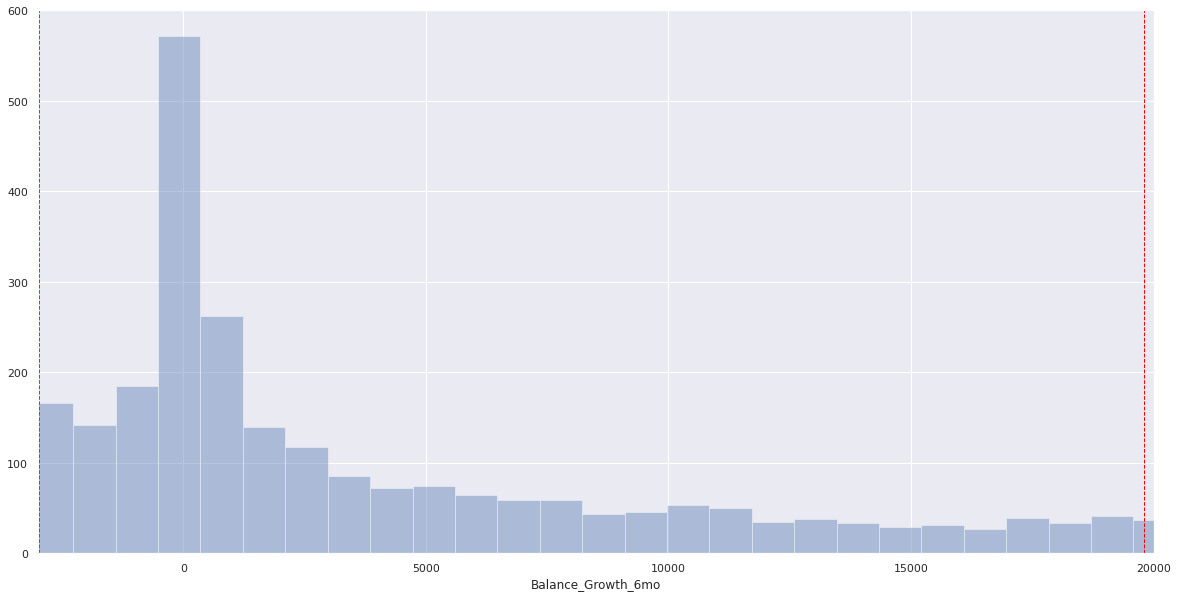

In [ ]:
Bal_Growth_df = raw_data['Balance_Growth_6mo']
sns.distplot(Bal_Growth_df, kde=False, bins=1000 )
plt.axvline(-2963, color='red', linestyle='dashed', linewidth=1)
plt.axvline(19794, color='red', linestyle='dashed', linewidth=1)
plt.xlim(-3000,20000)

In [ ]:
Bal_growth_bins = raw_data[["Balance_Growth_6mo","DEFAULT"]]
Bal_growth_bin = woeBinningPandas.woe_binning(Bal_growth_bins,"DEFAULT","Balance_Growth_6mo", 0.05, 0, 0.1, 50, 'DEFAULT')
Bal_growth_bin

/usr/local/lib/python3.6/dist-packages/woeBinningPandas/__init__.py:512: UserWarning: Incorrect specification of data frame and/or variables.
  warnings.warn("Incorrect specification of data frame and/or variables.")
/usr/local/lib/python3.6/dist-packages/woeBinningPandas/__init__.py:544: UserWarning: Incorrect variable specification.
Target variable must have two distinct values (NAs are accepted).
  warnings.warn("Incorrect variable specification.\nTarget variable must have two distinct values (NAs are accepted).")


,woe,cutpoints_final,upper_cutpoints_final_dfrm,iv_total_final,good,bad,col_perc_a,col_perc_b,iv_bins
predictor_var_binned,,,,,,,,,
"(-inf, -19459.0]",-54.271198,-inf,-19459,0.094992,34,206,0.032045,0.055139,0.012533
"(-19459.0, -5950.2]",1.005408,-19459.0,-5950.2,0.094992,107,373,0.100848,0.099839,0.000010
"(-5950.2, 0.0]",42.970084,-5950.2,0,0.094992,412,944,0.388313,0.252677,0.058283
"(0.0, inf]",-21.281923,0.0,inf,0.094992,508,2213,0.478794,0.592345,0.024166
Missing,NaN,inf,Missing,0.094992,0,0,0.000000,0.000000,NaN


In [ ]:
#**Bal_Growth_6mo - recommended transformation** Create bins as per WOE max  
#Leave out > -10k & <= 1k as cross correlation would render this variable irrelevant.   

raw_data["Balance_Growth_6mo_below_minus21k"] = np.where((raw_data["Balance_Growth_6mo"] <= -21800),1,0)
raw_data["Balance_Growth_6mo_below_minus10k"] = np.where((raw_data["Balance_Growth_6mo"] > -21800) | (raw_data["Balance_Growth_6mo"]<= -10000),1,0)
raw_data["Balance_Growth_6mo_above_1k"] = np.where( raw_data["Balance_Growth_6mo"] >= 1000,1,0)
raw_data[['Balance_Growth_6mo_below_minus21k','Balance_Growth_6mo_below_minus10k','Balance_Growth_6mo_above_1k']].describe()

,Balance_Growth_6mo_below_minus21k,Balance_Growth_6mo_below_minus10k,Balance_Growth_6mo_above_1k
count,4798.000000,4798.0,4798.000000
mean,0.044185,1.0,0.496248
std,0.205528,0.0,0.500038
min,0.000000,1.0,0.000000
25%,0.000000,1.0,0.000000
50%,0.000000,1.0,0.000000
75%,0.000000,1.0,1.000000
max,1.000000,1.0,1.000000


In [ ]:
# Create new variable: Util_Growth_6mo
#**Util_Growth_6mo - data description**  change in utilization over 6 months
## Create column Util_Growth_6mo ##

raw_data["Util_Growth_6mo"] = raw_data["Util_Bill_1"] - raw_data["Util_Bill_6"]

raw_data["Util_Growth_6mo"].describe()

count    4798.000000
mean        0.107708
std         0.298489
min        -1.047967
25%        -0.027061
50%         0.007556
75%         0.174607
max         2.626250
Name: Util_Growth_6mo, dtype: float64

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 811 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


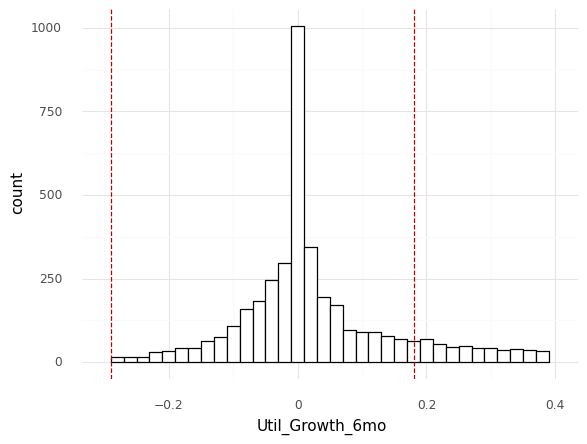

<ggplot: (8771180287296)>

In [ ]:
# Util_Growth_df = raw_data['Util_Growth_6mo']
# sns.distplot(Util_Growth_df, kde=False,  )
# plt.axvline(-.029, color='red', linestyle='dashed', linewidth=1)
# plt.axvline(.18, color='red', linestyle='dashed', linewidth=1)
# plt.xlim(-.3,.4)
# plt.xlabel("Util_Growth_6mo")

ggplot(data = raw_data, mapping=aes(x =raw_data['Util_Growth_6mo'])) + geom_histogram(binwidth = .02,colour = "black", fill = "white"
) + geom_vline(aes(xintercept = -0.29), colour = "#BB0000", linetype = "dashed"
) + geom_vline(aes(xintercept =0.18),colour = "#BB0000", linetype = "dashed") + theme_minimal() + xlim(-.3,.4) + xlab("Util_Growth_6mo")

In [ ]:
#**Util_Growth_6mo - bin analysis** - investigate binning options for variable split
# check WOE recommended binning and correlation in PAY_X

U_Growth_bins = raw_data[["Util_Growth_6mo","DEFAULT"]]
U_Growth_bin = woeBinningPandas.woe_binning(U_Growth_bins,"DEFAULT","Util_Growth_6mo", 0.05, 0, 0.1, 50, 'DEFAULT')
U_Growth_bin


/usr/local/lib/python3.6/dist-packages/woeBinningPandas/__init__.py:512: UserWarning: Incorrect specification of data frame and/or variables.
  warnings.warn("Incorrect specification of data frame and/or variables.")
/usr/local/lib/python3.6/dist-packages/woeBinningPandas/__init__.py:544: UserWarning: Incorrect variable specification.
Target variable must have two distinct values (NAs are accepted).
  warnings.warn("Incorrect variable specification.\nTarget variable must have two distinct values (NAs are accepted).")


,woe,cutpoints_final,upper_cutpoints_final_dfrm,iv_total_final,good,bad,col_perc_a,col_perc_b,iv_bins
predictor_var_binned,,,,,,,,,
"(-inf, -0.02706666667]",27.262067,-inf,-0.0270667,0.097547,326,874,0.307257,0.233940,0.019988
"(-0.02706666667, -0.001746477541]",-20.496601,-0.027067,-0.00174648,0.097547,90,389,0.084826,0.104122,0.003955
"(-0.001746477541, 0.0]",61.810296,-0.001746,0,0.097547,137,260,0.129123,0.069593,0.036796
"(0.0, 0.7185481818]",-26.460519,0.000000,0.718548,0.097547,444,2037,0.418473,0.545236,0.033542
"(0.7185481818, inf]",24.720275,0.718548,inf,0.097547,64,176,0.060320,0.047109,0.003266
Missing,NaN,inf,Missing,0.097547,0,0,0.000000,0.000000,NaN


In [ ]:
#**Util_Growth_6mo - recommended transformation** Create bins as per WOE max  
#Leave out > .113 & <= 1 as cross correlation would render this variable irrelevant.   
## split Util_Growth_6mo into 4 groups: <= -.03 <= -.003, <= 0, > 0

raw_data["Util_Growth_6mo_below_minus.03"] = np.where(raw_data["Util_Growth_6mo"] <= -.03,1,0)
raw_data["Util_Growth_6mo_below_minus.003"] = np.where((raw_data["Util_Growth_6mo"] > -.03) | (raw_data["Util_Growth_6mo"] <= -.003),1,0)
raw_data["Util_Growth_6mo_above_0"] = np.where(raw_data["Util_Growth_6mo"] > 0,1,0)
raw_data[['Util_Growth_6mo_below_minus.03','Util_Growth_6mo_below_minus.003','Util_Growth_6mo_above_0']].describe()

,Util_Growth_6mo_below_minus.03,Util_Growth_6mo_below_minus.003,Util_Growth_6mo_above_0
count,4798.000000,4798.0,4798.000000
mean,0.241351,1.0,0.567320
std,0.427947,0.0,0.495499
min,0.000000,1.0,0.000000
25%,0.000000,1.0,0.000000
50%,0.000000,1.0,1.000000
75%,0.000000,1.0,1.000000
max,1.000000,1.0,1.000000


In [ ]:
## Tree Moddeling

In [ ]:
%pip install plotnine


In [ ]:
import plotnine as p9

In [ ]:
#**target - transform response variable 'DEFAULT' into factor**

raw_data["target"] = raw_data["DEFAULT"].astype("category")
raw_data

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,u,train,test,validate,data.group,LIMIT_BAL_below_30k,LIMIT_BAL_above_160k,SEX_FEMALE,Married_Y,ED_Grad_other,AGE_below_25,AGE_25to35,AGE_above_40,PAY_X_Sum_6mo,...,Max_Bill_Amt_below_18k,Max_Bill_Amt_below_21k,Max_Bill_Amt_above_52k,PMT_SUM,Avg_Pmt_Amt,Max_Pmt_Amt,Avg_Pmt_Amt_below2k,Avg_Pmt_Amt_above12k,Util_Bill_1,Util_Bill_2,Util_Bill_3,Util_Bill_4,Util_Bill_5,Util_Bill_6,Util_SUM,Avg_Util,Avg_Util_below_.001,Avg_Util_above_.45,Pay_Ratio_1,Pay_Ratio_2,Pay_Ratio_3,Pay_Ratio_4,Pay_Ratio_5,Ratio_SUM,Avg_Pay_Ratio,Avg_Pay_Ratio_below_.035,Avg_Pay_Ratio_above_.113,Avg_Pay_Ratio_above_1,Max_DLQa,Max_DLQ,Max_DLQ_above1,Balance_Growth_6mo,Balance_Growth_6mo_below_minus21k,Balance_Growth_6mo_below_minus10k,Balance_Growth_6mo_above_1k,Util_Growth_6mo,Util_Growth_6mo_below_minus.03,Util_Growth_6mo_below_minus.003,Util_Growth_6mo_above_0,target
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1.0,0.287578,1.0,0.0,0.0,1.0,1,0,1,1,0,1,1,0,-2,...,1,1,0,689,114.833333,689,1,0,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.385200,0.064200,0,1,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.800000,0,1,0,2,2,1,3913,0,1,1,0.195650,0,1,1,1.0
1,2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1.0,0.788305,0.0,0.0,1.0,3.0,0,0,1,0,0,0,1,0,3,...,1,1,0,5000,833.333333,2000,1,0,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.142308,0.023718,0,1,0.000000,0.372856,0.305623,0.289436,0.000000,0.967915,0.193583,0,1,0,2,2,1,-579,0,1,0,-0.004825,0,1,0,1.0
2,3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0.0,0.408977,1.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,...,1,1,0,11018,1836.333333,5000,1,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,1.129478,0.188246,0,1,0.108220,0.110628,0.069779,0.066899,0.064313,0.419838,0.083968,0,1,0,0,0,0,13690,0,1,1,0.152111,0,1,1,0.0
3,4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0.0,0.883017,0.0,0.0,1.0,3.0,0,0,1,1,0,0,1,0,0,...,1,1,0,8388,1398.000000,2019,1,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,4.626680,0.771113,0,0,0.041465,0.040961,0.042382,0.037985,0.036180,0.198972,0.039794,0,1,0,0,0,0,17443,0,1,1,0.348860,0,1,1,0.0
4,5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0.0,0.940467,0.0,0.0,1.0,3.0,0,0,0,1,0,0,1,1,-2,...,1,1,0,59049,9841.500000,36681,0,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,2.186780,0.364463,0,1,0.352734,1.023608,0.477555,0.470072,0.036015,2.359984,0.471997,0,1,0,0,0,0,-10514,0,1,0,-0.210280,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,4794,4794,250000,1,1,2,44,0,0,0,0,0,0,98727,102134,106434,107673,109780,113961,5000,6000,4500,4000,6000,4500,0.0,0.517722,0.0,1.0,0.0,2.0,0,1,0,0,1,0,1,1,0,...,1,1,1,30000,5000.000000,6000,0,0,0.394908,0.408536,0.425736,0.430692,0.439120,0.455844,2.554836,0.425806,0,1,0.048955,0.056373,0.041793,0.036437,0.052650,0.236208,0.047242,0,1,0,0,0,0,-15234,0,1,0,-0.060936,1,1,0,0.0
4794,4795,4795,230000,2,2,2,25,0,0,0,0,-1,0,19225,16375,11864,10004,62349,52791,2000,2000,5000,65349,2000,2000,0.0,0.923285,0.0,0.0,1.0,3.0,0,1,1,0,0,1,1,0,-1,...,1,1,1,78349,13058.166667,65349,0,1,0.083587,0.071196,0.051583,0.043496,0.271083,0.229526,0.750470,0.125078,0,1,0.122137,0.168577,0.499800,1.048116,0.037885,1.876516,0.375303,0,1,0,0,0,0,-33566,1,1,0,-0.145939,1,1,0,0.0
4795,4796,4796,20000,1,3,1,40,0,0,0,0,0,0,20167,37198,17858,16400,

In [ ]:
#**initial data set for 'tree' type models using continuous variables**

sub_list_RF1 = ["LIMIT_BAL","SEX_FEMALE","EDUCATION",
               "Married_Y","AGE","PAY_X_Sum_6mo","Avg_Pmt_Amt","Avg_Util","Avg_Pay_Ratio",
               "Balance_Growth_6mo","Util_Growth_6mo","Max_Bill_Amt","Max_Pmt_Amt",
               "Max_DLQ","DEFAULT"]

xtrain_RF1  = raw_data.loc[(raw_data["data.group"]==1),sub_list_RF1 ]             


xtest_RF1 = raw_data.loc[(raw_data["data.group"]==2),sub_list_RF1 ] 
validate_RF1 =  raw_data.loc[(raw_data["data.group"]==3),sub_list_RF1 ] 

xtrain_RF1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2408 entries, 0 to 4795
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           2408 non-null   int64  
 1   SEX_FEMALE          2408 non-null   int64  
 2   EDUCATION           2408 non-null   int64  
 3   Married_Y           2408 non-null   int64  
 4   AGE                 2408 non-null   int64  
 5   PAY_X_Sum_6mo       2408 non-null   int64  
 6   Avg_Pmt_Amt         2408 non-null   float64
 7   Avg_Util            2408 non-null   float64
 8   Avg_Pay_Ratio       2408 non-null   float64
 9   Balance_Growth_6mo  2408 non-null   int64  
 10  Util_Growth_6mo     2408 non-null   float64
 11  Max_Bill_Amt        2408 non-null   int64  
 12  Max_Pmt_Amt         2408 non-null   int64  
 13  Max_DLQ             2408 non-null   int64  
 14  DEFAULT             2408 non-null   float64
dtypes: float64(5), int64(10)
memory usage: 301.0 KB


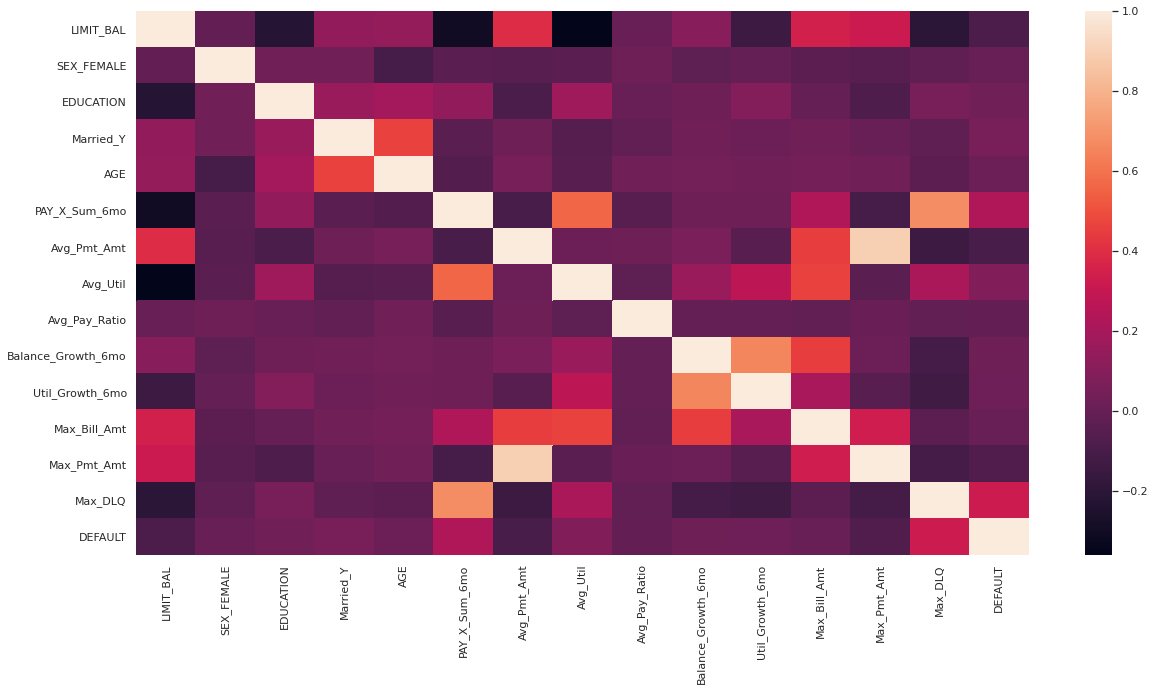

In [ ]:
## Correlation Check & final variable selection:
data_cor =xtrain_RF1.corr()
sns.heatmap(data_cor)



In [ ]:
# check correlation of BILL_X Sum Variable
Train_RF1_correlation = raw_data[sub_list_RF1].corr()

Train_RF1_correlation.iloc[:, [14]]

,DEFAULT
LIMIT_BAL,-0.102519
SEX_FEMALE,-0.012212
EDUCATION,0.036612
Married_Y,0.045602
AGE,0.025047
PAY_X_Sum_6mo,0.232326
Avg_Pmt_Amt,-0.104340
Avg_Util,0.081883
Avg_Pay_Ratio,-0.007212
Balance_Growth_6mo,-0.013528


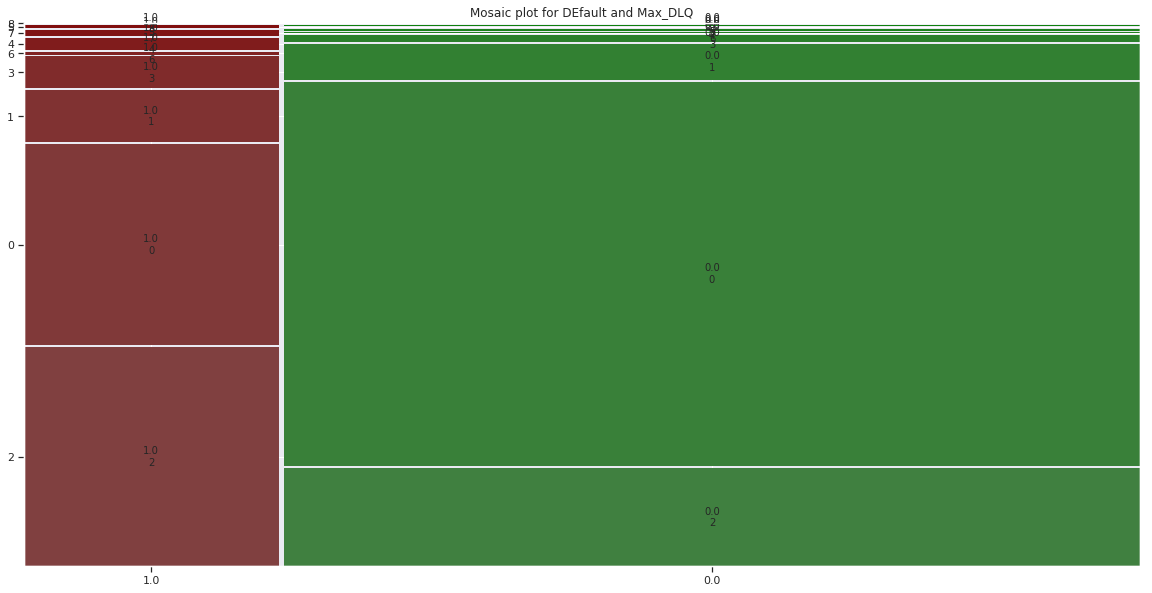

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(xtrain_RF1,  ["DEFAULT" , "Max_DLQ"] ,title='Mosaic plot for DEfault and Max_DLQ' )
plt.show()


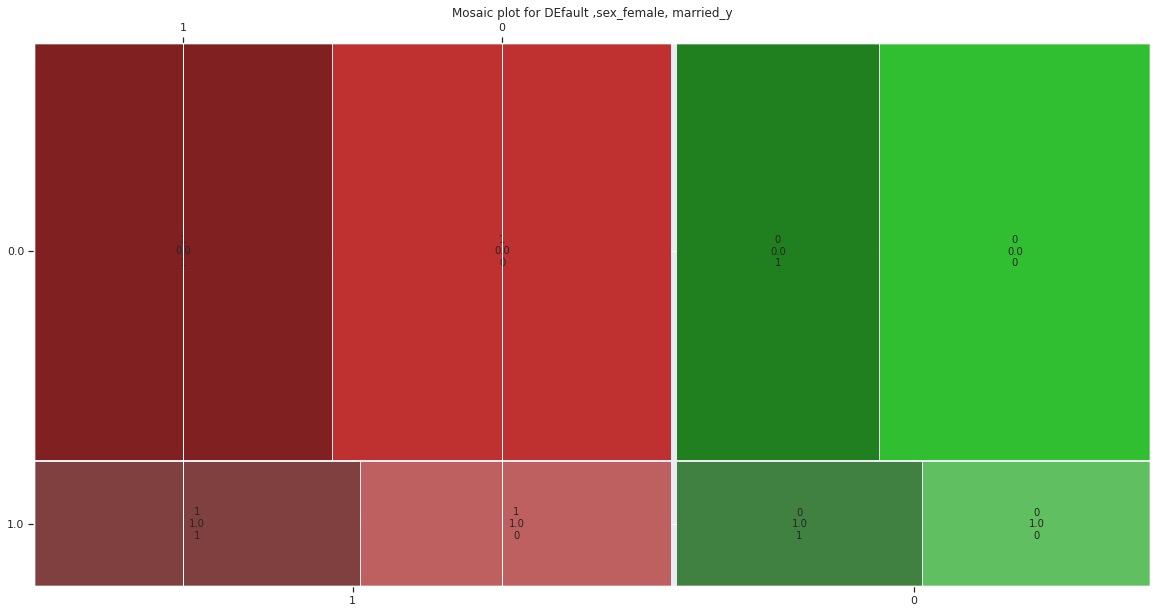

In [ ]:
mosaic(xtrain_RF1,  ["SEX_FEMALE","DEFAULT", "Married_Y"] ,title='Mosaic plot for DEfault ,sex_female, married_y' )
plt.show()

In [ ]:
#**initial data set for 'tree' type models using continuous variables**

sub_list_RFb = ["LIMIT_BAL","SEX_FEMALE","EDUCATION",
               "Married_Y","AGE","PAY_X_Sum_6mo","Avg_Pmt_Amt","Avg_Util","Avg_Pay_Ratio",
               "Balance_Growth_6mo","Util_Growth_6mo","Max_Bill_Amt","Max_Pmt_Amt",
               "Max_DLQ","target"]

target_rf1_train = raw_data.loc[(raw_data["data.group"]==1), "target"]
target_rf1_test = raw_data.loc[(raw_data["data.group"]==2), "target"]  
xtrain_RF1  = raw_data.loc[(raw_data["data.group"]==1),sub_list_RFb ]             
xtest_RF1 = raw_data.loc[(raw_data["data.group"]==2),sub_list_RFb ] 
validate_RF1 =  raw_data.loc[(raw_data["data.group"]==3),sub_list_RFb ] 

xtrain_RF1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2408 entries, 0 to 4795
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   LIMIT_BAL           2408 non-null   int64   
 1   SEX_FEMALE          2408 non-null   int64   
 2   EDUCATION           2408 non-null   int64   
 3   Married_Y           2408 non-null   int64   
 4   AGE                 2408 non-null   int64   
 5   PAY_X_Sum_6mo       2408 non-null   int64   
 6   Avg_Pmt_Amt         2408 non-null   float64 
 7   Avg_Util            2408 non-null   float64 
 8   Avg_Pay_Ratio       2408 non-null   float64 
 9   Balance_Growth_6mo  2408 non-null   int64   
 10  Util_Growth_6mo     2408 non-null   float64 
 11  Max_Bill_Amt        2408 non-null   int64   
 12  Max_Pmt_Amt         2408 non-null   int64   
 13  Max_DLQ             2408 non-null   int64   
 14  target              2408 non-null   category
dtypes: category(1), float64(4), int64(10)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
cols = ["LIMIT_BAL","SEX_FEMALE","EDUCATION",
               "Married_Y","AGE","PAY_X_Sum_6mo","Avg_Pmt_Amt","Avg_Util","Avg_Pay_Ratio",
               "Balance_Growth_6mo","Util_Growth_6mo","Max_Bill_Amt","Max_Pmt_Amt",
               "Max_DLQ"]
clf = DecisionTreeClassifier()
clf.fit(xtrain_RF1[cols], xtrain_RF1.target)
clf.feature_importances_

d ={
    "Variables": cols,
    "Overall":list(clf.feature_importances_),
}

importance_t = pd.DataFrame(data=d)
importance_t.sort_values(by=["Overall"], ascending=False )

,Variables,Overall
6,Avg_Pmt_Amt,0.108378
11,Max_Bill_Amt,0.101814
4,AGE,0.099507
13,Max_DLQ,0.097506
10,Util_Growth_6mo,0.094224
12,Max_Pmt_Amt,0.090351
7,Avg_Util,0.087927
0,LIMIT_BAL,0.072543
5,PAY_X_Sum_6mo,0.072185
8,Avg_Pay_Ratio,0.070032


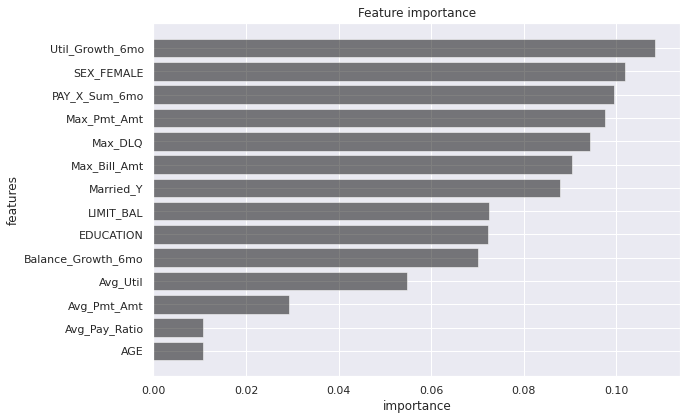

In [ ]:
plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(cols))
bar_width = 0.35
plt.barh(importance_t["Variables"].sort_values(),importance_t["Overall"].sort_values() , color='black', alpha=0.5)
plt.ylabel('features')
plt.xlabel('importance')
plt.title('Feature importance')
plt.tight_layout()
plt.show()

In [ ]:
sub_list_RFb = ["LIMIT_BAL","SEX_FEMALE","EDUCATION",
               "Married_Y","AGE","PAY_X_Sum_6mo","Avg_Pmt_Amt","Avg_Util","Avg_Pay_Ratio",
               "Balance_Growth_6mo","Util_Growth_6mo","Max_Bill_Amt","Max_Pmt_Amt",
               "Max_DLQ"]
target = raw_data.loc[raw_data["data.group"] == 1, "target" ]
# target

xtrain_RF1  = raw_data.loc[(raw_data["data.group"]==1),sub_list_RFb ]             


xtest_RF1 = raw_data.loc[(raw_data["data.group"]==2),sub_list_RFb ] 
validate_RF1 =  raw_data.loc[(raw_data["data.group"]==3),sub_list_RFb ] 

xtrain_RF1.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2408 entries, 0 to 4795
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           2408 non-null   int64  
 1   SEX_FEMALE          2408 non-null   int64  
 2   EDUCATION           2408 non-null   int64  
 3   Married_Y           2408 non-null   int64  
 4   AGE                 2408 non-null   int64  
 5   PAY_X_Sum_6mo       2408 non-null   int64  
 6   Avg_Pmt_Amt         2408 non-null   float64
 7   Avg_Util            2408 non-null   float64
 8   Avg_Pay_Ratio       2408 non-null   float64
 9   Balance_Growth_6mo  2408 non-null   int64  
 10  Util_Growth_6mo     2408 non-null   float64
 11  Max_Bill_Amt        2408 non-null   int64  
 12  Max_Pmt_Amt         2408 non-null   int64  
 13  Max_DLQ             2408 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 282.2 KB


In [ ]:
# Use the forest's predict method on the test data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,recall_score, accuracy_score



rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data

rf.fit(xtrain_RF1, target);
predRF1 = rf.predict(xtrain_RF1)
predRF1_prob = rf.predict_proba(xtrain_RF1)



In [ ]:
cm = confusion_matrix(target, predRF1)
cm
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(f"Specificity accuracy for random forest Train is {specificity}") 
sensivity = recall_score(target, predRF1)
print(f"Sensitivity accuracy for random forest Train is {sensivity}") 
accuracy = accuracy_score(target, predRF1)
print(f"Prediction accuracy for random forest train is {accuracy}")

Specificity accuracy for random forest Train is 1.0
Sensitivity accuracy for random forest Train is 1.0
Prediction accuracy for random forest train is 1.0


ROC AUC=1.000


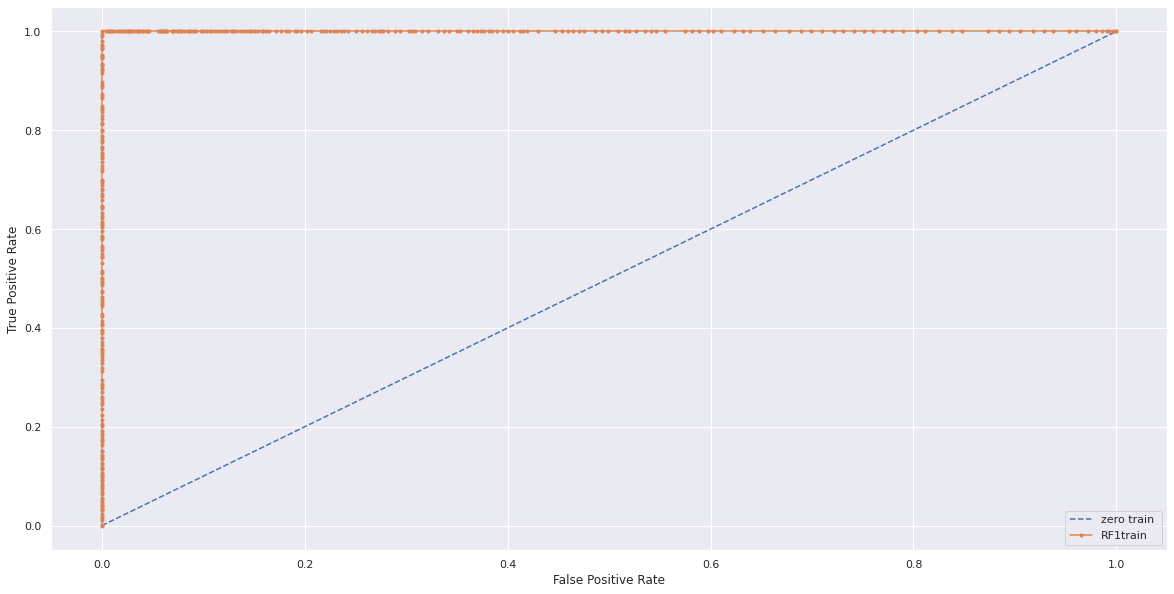

In [ ]:

# Use the forest's predict method on the test data
predRF1_prob = rf.predict_proba(xtrain_RF1)

predRF1_prob = predRF1_prob[:, 1]
predRF1_prob

# calculate scores
ns_probs = [0 for _ in range(len(target))]

ns_auc = roc_auc_score(target, ns_probs)
pred_auc = roc_auc_score(target, predRF1_prob)
 
 # summarize scores
# print(': ROC AUC=%.3f' % (ns_auc))
print('ROC AUC=%.3f' % (pred_auc))



ns_fpr, ns_tpr, _ = roc_curve(target, ns_probs)
pred_fpr, pred_tpr, _ = roc_curve(target, predRF1_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='zero train ')
plt.plot(pred_fpr, pred_tpr, marker='.', label='RF1train')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [ ]:
target_test = raw_data.loc[raw_data["data.group"] == 2, "target" ]
rfpredict = rf.predict(xtest_RF1)
# rfpredict
accuracy = accuracy_score(rfpredict, target_test)
print(f"RF1 test accuracy is {accuracy}")
sensitiviy =recall_score(rfpredict, target_test)
print(f"Rf1test sensitivy is {sensitiviy}")
cm = confusion_matrix(rfpredict, target_test)
cm
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(f"Specificity accuracy for random forest test is {specificity}")

RF1 test accuracy is 0.804635761589404
Rf1test sensitivy is 0.5371900826446281
Specificity accuracy for random forest test is 0.5371900826446281


RF1test ROC AUC=0.729


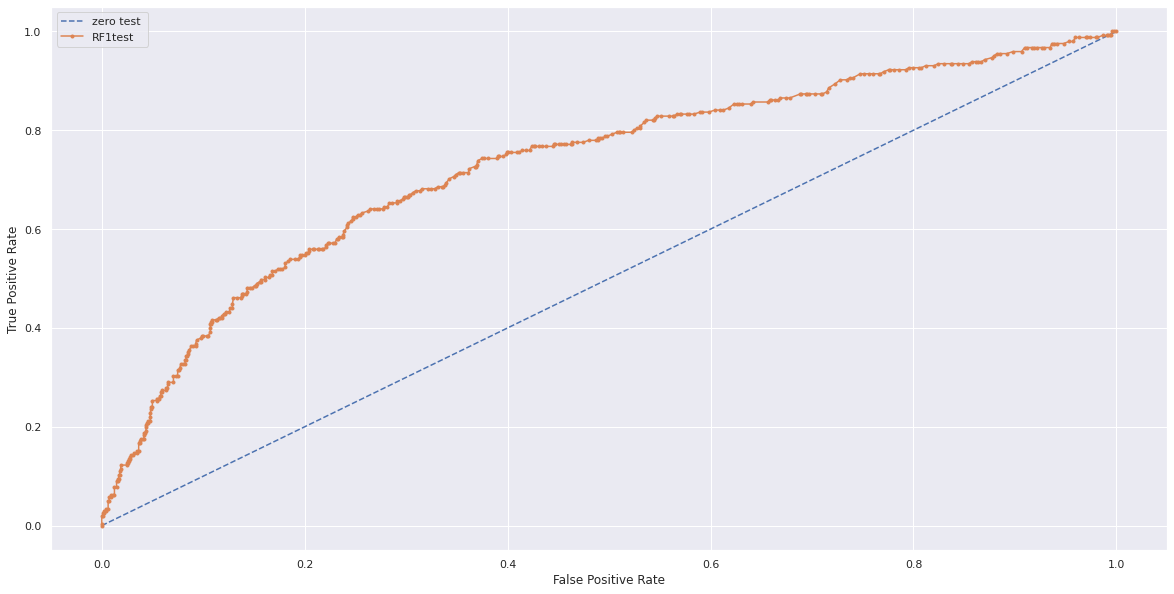

In [ ]:
### Predicting on test set  ##

# Use the forest's predict method on the test data
predRF1_test = rf.predict_proba(xtest_RF1)

predRF1_test = predRF1_test[:, 1]
predRF1_test

# calculate scores
ns_probs = [0 for _ in range(len(target_test))]

ns_auc = roc_auc_score(target_test, ns_probs)
pred_auc = roc_auc_score(target_test, predRF1_test)
 
 # summarize scores
# print(': ROC AUC=%.3f' % (ns_auc))
print('RF1test ROC AUC=%.3f' % (pred_auc))



ns_fpr, ns_tpr, _ = roc_curve(target_test, ns_probs)
pred_fpr, pred_tpr, _ = roc_curve(target_test, predRF1_test)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='zero test ')
plt.plot(pred_fpr, pred_tpr, marker='.', label='RF1test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [ ]:
## Gradient Boosting method

#**set up train/test/validate data**
sub_list_GBM = ["LIMIT_BAL","SEX_FEMALE","EDUCATION",
               "Married_Y","AGE","PAY_X_Sum_6mo","Avg_Pmt_Amt",
               "Balance_Growth_6mo","Max_Bill_Amt","Max_DLQ","target"]

target_tain_GBM = raw_data.loc[(raw_data["data.group"]==1),"target" ] 
target_test_GBM = raw_data.loc[(raw_data["data.group"]==2),"target" ] 
xtrain_GBM = raw_data.loc[(raw_data["data.group"]==1),sub_list_GBM ] 
xtest_GBM = raw_data.loc[(raw_data["data.group"]==2),sub_list_GBM ] 
validate_GBM = raw_data.loc[(raw_data["data.group"]==3),sub_list_GBM ] 
xtrain_GBM.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2408 entries, 0 to 4795
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   LIMIT_BAL           2408 non-null   int64   
 1   SEX_FEMALE          2408 non-null   int64   
 2   EDUCATION           2408 non-null   int64   
 3   Married_Y           2408 non-null   int64   
 4   AGE                 2408 non-null   int64   
 5   PAY_X_Sum_6mo       2408 non-null   int64   
 6   Avg_Pmt_Amt         2408 non-null   float64 
 7   Balance_Growth_6mo  2408 non-null   int64   
 8   Max_Bill_Amt        2408 non-null   int64   
 9   Max_DLQ             2408 non-null   int64   
 10  target              2408 non-null   category
dtypes: category(1), float64(1), int64(9)
memory usage: 209.4 KB


In [ ]:
# fit a model
GBM = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
GBM.fit(xtrain_GBM, target_tain_GBM)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.75, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
pred = GBM.predict(xtrain_GBM)

accuracy = accuracy_score(pred, target_tain_GBM)
print(f"GBMtrain accuracy is {accuracy}")
sensitiviy =recall_score(pred, target_tain_GBM)
print(f"GBMtrain sensitivy is {sensitiviy}")
cm = confusion_matrix(pred, target_tain_GBM)
cm
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(f"Specificity accuracy for GBM train test is {specificity}")

GBMtrain accuracy is 1.0
GBMtrain sensitivy is 1.0
Specificity accuracy for GBM train test is 1.0


GBM accuracy score using ROC AUC=1.000


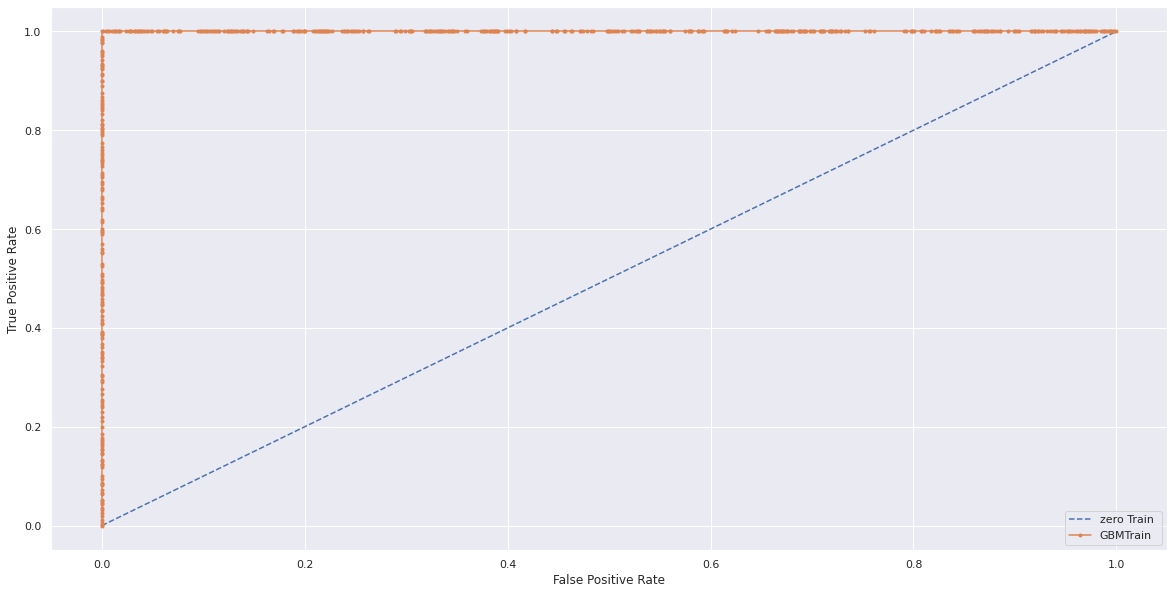

In [ ]:
# Use the forest's predict method on the test data
predGBM_train = GBM.predict_proba(xtrain_GBM)

predGBM_train = predGBM_train[:, 1]
len(predGBM_train)

# calculate scores
ns_probs = [0 for _ in range(len(target_tain_GBM))]

ns_auc = roc_auc_score(target_tain_GBM, ns_probs)
pred_train_auc = roc_auc_score(target_tain_GBM, predGBM_train)
 
 # summarize scores
# print(': ROC AUC=%.3f' % (ns_auc))
print('GBM accuracy score using ROC AUC=%.3f' % (pred_train_auc))


ns_fpr, ns_tpr, _ = roc_curve(target_tain_GBM, ns_probs)
pred_fpr, pred_tpr, _ = roc_curve(target_tain_GBM, predGBM_train)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='zero Train ')
plt.plot(pred_fpr, pred_tpr, marker='.', label='GBMTrain')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
# fit a model
GBM = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
GBM.fit(xtest_GBM, target_test_GBM)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.75, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
pred = GBM.predict(xtest_GBM)

accuracy = accuracy_score(pred, target_test_GBM)
print(f"GBMtest accuracy is {accuracy}")
sensitiviy =recall_score(pred, target_test_GBM)
print(f"GBMtest sensitivy is {sensitiviy}")

cm = confusion_matrix(pred, target_test_GBM)
cm
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(f"Specificity accuracy for GBMtest is {specificity}")

GBMtest accuracy is 1.0
GBMtest sensitivy is 1.0
Specificity accuracy for GBMtest is 1.0


GBMt accuracy score using ROC AUC=1.000


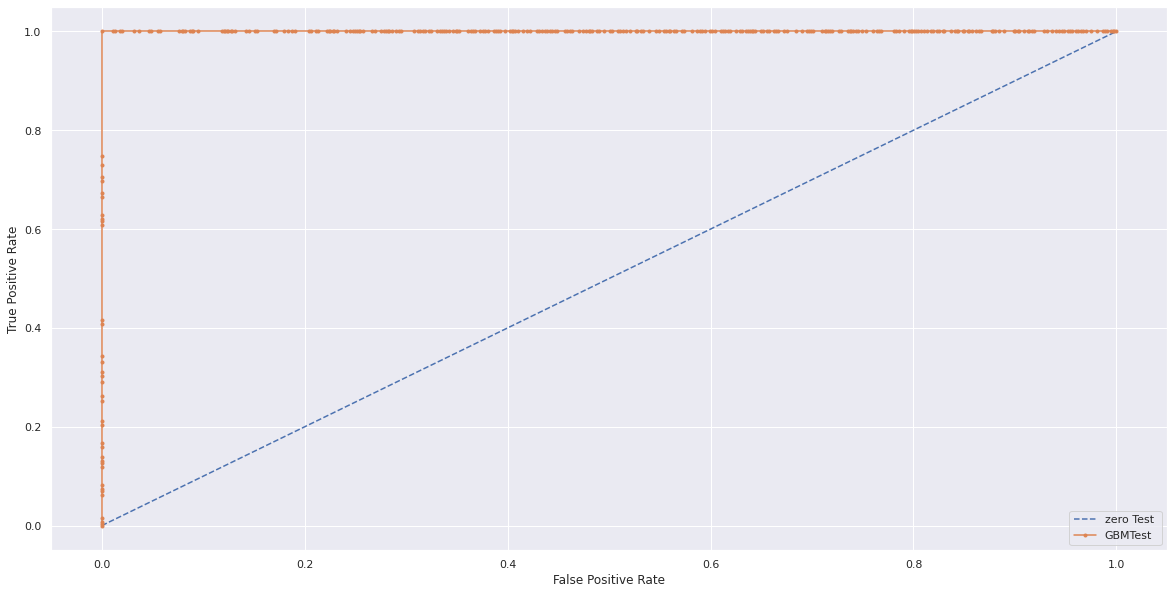

In [ ]:
# Use the forest's predict method on the test data
predGBM_test = GBM.predict_proba(xtest_GBM)

predGBM_test = predGBM_test[:, 1]
len(predGBM_test)

# calculate scores
ns_probs = [0 for _ in range(len(target_test_GBM))]

ns_auc = roc_auc_score(target_test_GBM, ns_probs)
pred_test_auc = roc_auc_score(target_test_GBM, predGBM_test)
 
 # summarize scores
# print(': ROC AUC=%.3f' % (ns_auc))
print('GBMt accuracy score using ROC AUC=%.3f' % (pred_test_auc))


ns_fpr, ns_tpr, _ = roc_curve(target_test_GBM, ns_probs)
pred_fpr, pred_tpr, _ = roc_curve(target_test_GBM, predGBM_test)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='zero Test ')
plt.plot(pred_fpr, pred_tpr, marker='.', label='GBMTest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
###Lgistic Regression

In [ ]:
#Data for model prior to variable selection**      

sub_list_GLM = ["LIMIT_BAL_below_30k","LIMIT_BAL_above_160k","SEX_FEMALE","ED_Grad_other",
              "Married_Y","AGE_below_25","AGE_25to35","AGE_above_40",
              "PAY_X_Sum_6mo_belowZero","PAY_X_Sum_6mo_aboveFive",
              "Max_Bill_Amt_below_600","Max_Bill_Amt_below_4k","Max_Bill_Amt_below_18k",
              "Max_Bill_Amt_below_21k","Max_Bill_Amt_above_52k",
              "Avg_Pmt_Amt_below2k","Avg_Pmt_Amt_above12k",
              "Avg_Util_below_.001","Avg_Util_above_.45",
              "Avg_Pay_Ratio_below_.035","Avg_Pay_Ratio_above_.113","Avg_Pay_Ratio_above_1",
              "Max_DLQ_above1","Balance_Growth_6mo_below_minus21k","Balance_Growth_6mo_below_minus10k",
              "Balance_Growth_6mo_above_1k","Util_Growth_6mo_below_minus.03",
              "Util_Growth_6mo_below_minus.003","Util_Growth_6mo_above_0","DEFAULT"]

target_train_GLM = raw_data.loc[(raw_data["data.group"]==1),"target" ] 
target_test_GLM = raw_data.loc[(raw_data["data.group"]==2),"target" ] 
xtrain_GLM = raw_data.loc[(raw_data["data.group"]==1),sub_list_RFb ] 
xtest_GLM = raw_data.loc[(raw_data["data.group"]==2),sub_list_RFb ] 
validate_GLM = raw_data.loc[(raw_data["data.group"]==3),sub_list_RFb ] 

xtrain_GLM.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2408 entries, 0 to 4795
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           2408 non-null   int64  
 1   SEX_FEMALE          2408 non-null   int64  
 2   EDUCATION           2408 non-null   int64  
 3   Married_Y           2408 non-null   int64  
 4   AGE                 2408 non-null   int64  
 5   PAY_X_Sum_6mo       2408 non-null   int64  
 6   Avg_Pmt_Amt         2408 non-null   float64
 7   Avg_Util            2408 non-null   float64
 8   Avg_Pay_Ratio       2408 non-null   float64
 9   Balance_Growth_6mo  2408 non-null   int64  
 10  Util_Growth_6mo     2408 non-null   float64
 11  Max_Bill_Amt        2408 non-null   int64  
 12  Max_Pmt_Amt         2408 non-null   int64  
 13  Max_DLQ             2408 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 282.2 KB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
#Logistic Regression (Model 3)
#**data selection & train/test split**

sub_list_GLM2 = ["LIMIT_BAL_below_30k","LIMIT_BAL_above_160k","SEX_FEMALE",
              "Married_Y","AGE_25to35","PAY_X_Sum_6mo_belowZero","PAY_X_Sum_6mo_aboveFive",
              "Max_Bill_Amt_below_600","Max_Bill_Amt_below_4k","Max_Bill_Amt_below_18k",
              "Max_Bill_Amt_above_52k","Avg_Pmt_Amt_below2k","Avg_Pmt_Amt_above12k",
              "Avg_Util_below_.001","Avg_Util_above_.45","Avg_Pay_Ratio_above_.113","Avg_Pay_Ratio_above_1",
              "Max_DLQ_above1","Balance_Growth_6mo_below_minus21k","Util_Growth_6mo_below_minus.03",
              "Util_Growth_6mo_above_0","target"]


target_train_GLM2 = raw_data.loc[(raw_data["data.group"]==1),"target" ] 
target_test_GLM2 = raw_data.loc[(raw_data["data.group"]==2),"target" ] 
xtrain_GLM2 = raw_data.loc[(raw_data["data.group"]==1),sub_list_RFb ] 
xtest_GLM2 = raw_data.loc[(raw_data["data.group"]==2),sub_list_RFb ] 
validate_GLM2 = raw_data.loc[(raw_data["data.group"]==3),sub_list_RFb ] 

xtrain_GLM2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2408 entries, 0 to 4795
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           2408 non-null   int64  
 1   SEX_FEMALE          2408 non-null   int64  
 2   EDUCATION           2408 non-null   int64  
 3   Married_Y           2408 non-null   int64  
 4   AGE                 2408 non-null   int64  
 5   PAY_X_Sum_6mo       2408 non-null   int64  
 6   Avg_Pmt_Amt         2408 non-null   float64
 7   Avg_Util            2408 non-null   float64
 8   Avg_Pay_Ratio       2408 non-null   float64
 9   Balance_Growth_6mo  2408 non-null   int64  
 10  Util_Growth_6mo     2408 non-null   float64
 11  Max_Bill_Amt        2408 non-null   int64  
 12  Max_Pmt_Amt         2408 non-null   int64  
 13  Max_DLQ             2408 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 282.2 KB


In [ ]:
GLM2  = LogisticRegression()
GLM2.fit(xtrain_GLM2, target_train_GLM2)

predGLM2_train = GLM2.predict(xtrain_GLM2)
predGLM2_train

accuracy = accuracy_score(predGLM2_train, target_train_GLM2)
print(f"LogisticRegresion_train accuracy is {accuracy}")
sensitiviy =recall_score(predGLM2_train, target_train_GLM2)
print(f"LogisticRegresion_train sensitivy is {sensitiviy}")

cm = confusion_matrix(predGLM2_train, target_train_GLM2)
cm
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(f"Specificity accuracy for LogisticRegresion_train test is {specificity}")


LogisticRegresion_train accuracy is 0.7711794019933554
LogisticRegresion_train sensitivy is 1.0
Specificity accuracy for LogisticRegresion_train test is 1.0


Logistuc regressiontrain ROC AUC=0.605


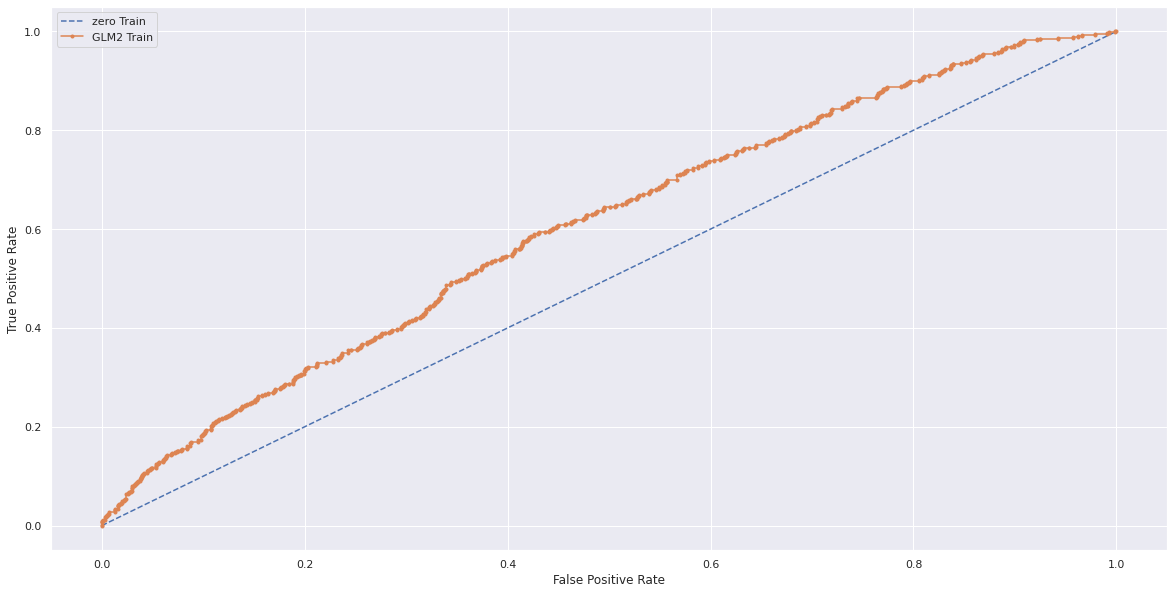

In [ ]:
predGLM2_prob = GLM2.predict_proba(xtrain_GLM2)
predGLM2_prob

predGLM2_prob = predGLM2_prob[:, 1]
len(predGLM2_prob)

# calculate scores
ns_probs = [0 for _ in range(len(target_train_GLM2))]

ns_auc = roc_auc_score(target_train_GLM2, ns_probs)
pred_train_auc = roc_auc_score(target_train_GLM2, predGLM2_prob)
 
 # summarize scores
# print(': ROC AUC=%.3f' % (ns_auc))
print('Logistuc regressiontrain ROC AUC=%.3f' % (pred_train_auc))


ns_fpr, ns_tpr, _ = roc_curve(target_train_GLM2, ns_probs)
pred_fpr, pred_tpr, _ = roc_curve(target_train_GLM2, predGLM2_prob)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='zero Train ')
plt.plot(pred_fpr, pred_tpr, marker='.', label='GLM2 Train')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:


predGLM2_test = GLM2.predict(xtest_GLM2)
predGLM2_test

accuracy = accuracy_score(predGLM2_test, target_test_GLM2)
print(f"LogisticRegresion_test accuracy is {accuracy}")
sensitiviy =recall_score(predGLM2_test, target_test_GLM2)
print(f"LogisticRegresion_test sensitivy is {sensitiviy}")
cm = confusion_matrix(predGLM2_test, target_test_GLM2)
cm
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(f"Specificity accuracy for LogisticRegresion_test is {specificity}")



LogisticRegresion_test accuracy is 0.7980132450331126
LogisticRegresion_test sensitivy is 1.0
Specificity accuracy for LogisticRegresion_test is 1.0


Logistic regression Test ROC AUC=0.610


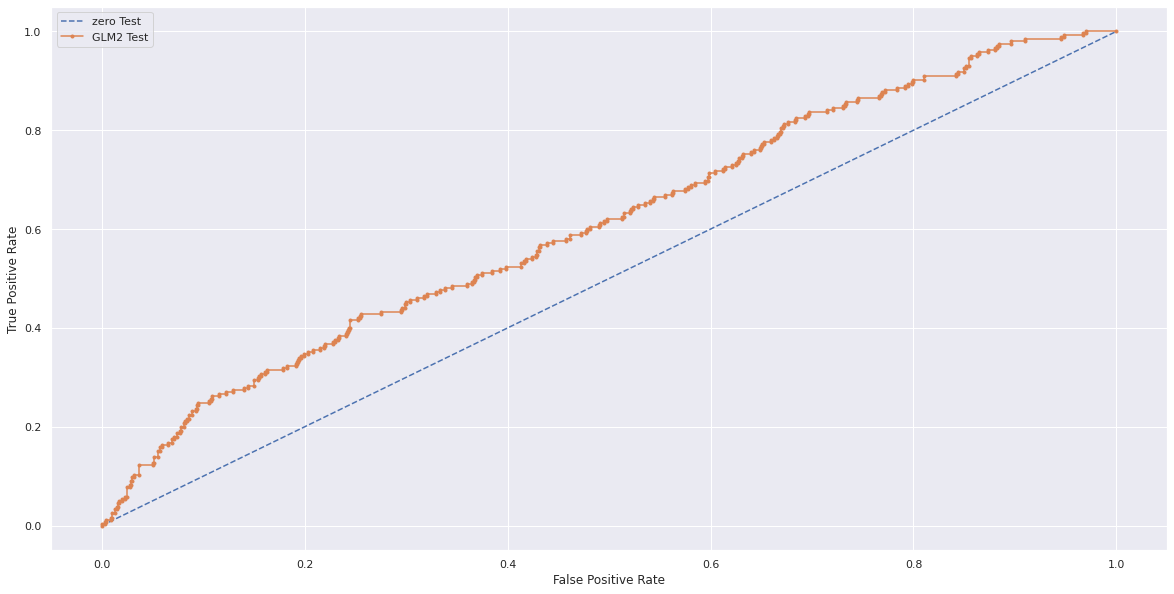

In [ ]:
predGLM2_prob = GLM2.predict_proba(xtest_GLM2)
predGLM2_prob

predGLM2_prob = predGLM2_prob[:, 1]
len(predGLM2_prob)

# calculate scores
ns_probs = [0 for _ in range(len(target_test_GLM2))]

ns_auc = roc_auc_score(target_test_GLM2, ns_probs)
pred_train_auc = roc_auc_score(target_test_GLM2, predGLM2_prob)
 
 # summarize scores
# print(': ROC AUC=%.3f' % (ns_auc))
print('Logistic regression Test ROC AUC=%.3f' % (pred_train_auc))


ns_fpr, ns_tpr, _ = roc_curve(target_test_GLM2, ns_probs)
pred_fpr, pred_tpr, _ = roc_curve(target_test_GLM2, predGLM2_prob)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='zero Test ')
plt.plot(pred_fpr, pred_tpr, marker='.', label='GLM2 Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
## Principal component analysis


In [ ]:
#**Variable importance for Model 4 selection** 
coeffs = GLM2.coef_.tolist()[0]
len(coeffs)
d ={
    "Variables":xtrain_GLM2.columns,
    "Overall": coeffs 
}

importance_t = pd.DataFrame(data=d)
importance_t.sort_values(by=["Overall"], ascending=False )

,Variables,Overall
5,PAY_X_Sum_6mo,0.004065
13,Max_DLQ,0.000703
12,Max_Pmt_Amt,0.000025
11,Max_Bill_Amt,0.000005
9,Balance_Growth_6mo,-0.000001
0,LIMIT_BAL,-0.000001
3,Married_Y,-0.000105
10,Util_Growth_6mo,-0.000114
6,Avg_Pmt_Amt,-0.000174
7,Avg_Util,-0.000306


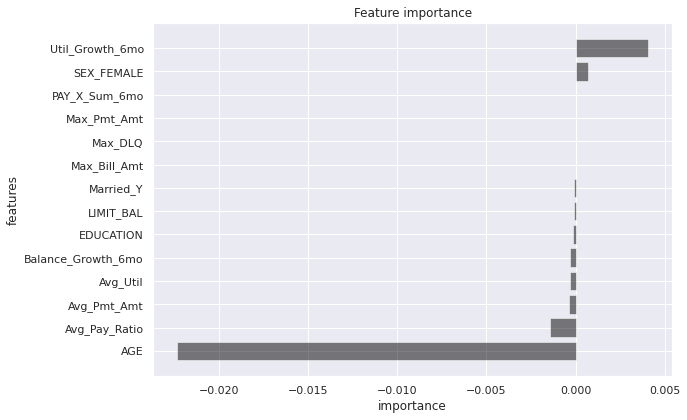

In [ ]:
# Variable importance plot
plt.figure(figsize=(6 * 1.618, 6))
bar_width = 0.35
plt.barh(importance_t["Variables"].sort_values(),importance_t["Overall"].sort_values() , color='black', alpha=0.5)
plt.ylabel('features')
plt.xlabel('importance')
plt.title('Feature importance')
plt.tight_layout()
plt.show()

In [ ]:
## Principal Components & Neural Network - PCANNet (Model 4)    
#**data selection & train/test split**   
#**remove:** Avg_Util, Avg_Pay_Ratio & Util_Growth_6mo   
sub_list_PCA = ["LIMIT_BAL_below_30k","LIMIT_BAL_above_160k","SEX_FEMALE",
              "Married_Y","AGE_25to35","PAY_X_Sum_6mo_belowZero","PAY_X_Sum_6mo_aboveFive",
              "Max_Bill_Amt_below_600","Max_Bill_Amt_below_4k","Max_Bill_Amt_below_18k",
              "Max_Bill_Amt_above_52k","Avg_Pmt_Amt_below2k","Avg_Pmt_Amt_above12k",
              "Max_DLQ_above1","Balance_Growth_6mo_below_minus21k","target"]

target_train_PCA =raw_data.loc[(raw_data["data.group"]==1),"target"] 
target_test_PCA =raw_data.loc[(raw_data["data.group"]==2),"target"] 

xtrain_PCA = raw_data.loc[(raw_data["data.group"]==1),sub_list_PCA ] 
xtest_PCA = raw_data.loc[(raw_data["data.group"]==2),sub_list_PCA ] 
validate_PCA = raw_data.loc[(raw_data["data.group"]==3),sub_list_PCA ] 

xtrain_PCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2408 entries, 0 to 4795
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   LIMIT_BAL_below_30k                2408 non-null   int64   
 1   LIMIT_BAL_above_160k               2408 non-null   int64   
 2   SEX_FEMALE                         2408 non-null   int64   
 3   Married_Y                          2408 non-null   int64   
 4   AGE_25to35                         2408 non-null   int64   
 5   PAY_X_Sum_6mo_belowZero            2408 non-null   int64   
 6   PAY_X_Sum_6mo_aboveFive            2408 non-null   int64   
 7   Max_Bill_Amt_below_600             2408 non-null   int64   
 8   Max_Bill_Amt_below_4k              2408 non-null   int64   
 9   Max_Bill_Amt_below_18k             2408 non-null   int64   
 10  Max_Bill_Amt_above_52k             2408 non-null   int64   
 11  Avg_Pmt_Amt_below2k                2408 non

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(xtrain_PCA)
# Apply transform to both the training set and the test set.
train_pca = scaler.transform(xtrain_PCA)
test_pca = scaler.transform(xtest_PCA)

In [ ]:
pca.fit(xtrain_PCA)
train_pca = pca.transform(xtrain_PCA)
test_pca = pca.transform(xtest_PCA)

In [ ]:
#Logistic regression after PC transformation
GLMPCA  = LogisticRegression()
GLMPCA.fit(train_pca, target_train_PCA)

predPCA_train = GLMPCA.predict(train_pca)
predPCA_train

accuracy = accuracy_score(predPCA_train, target_train_PCA)
print(f"LogisticRegresion_train accuracy is {accuracy}")
sensitiviy =recall_score(predPCA_train, target_train_PCA)
print(f"LogisticRegresion_train sensitivy is {sensitiviy}")

cm = confusion_matrix(predPCA_train, target_train_PCA)
cm
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(f"Specificity accuracy for LogisticRegresion_train test is {specificity}")


LogisticRegresion_train accuracy is 1.0
LogisticRegresion_train sensitivy is 1.0
Specificity accuracy for LogisticRegresion_train test is 1.0


PCA LOGIT  ROC AUC=1.000


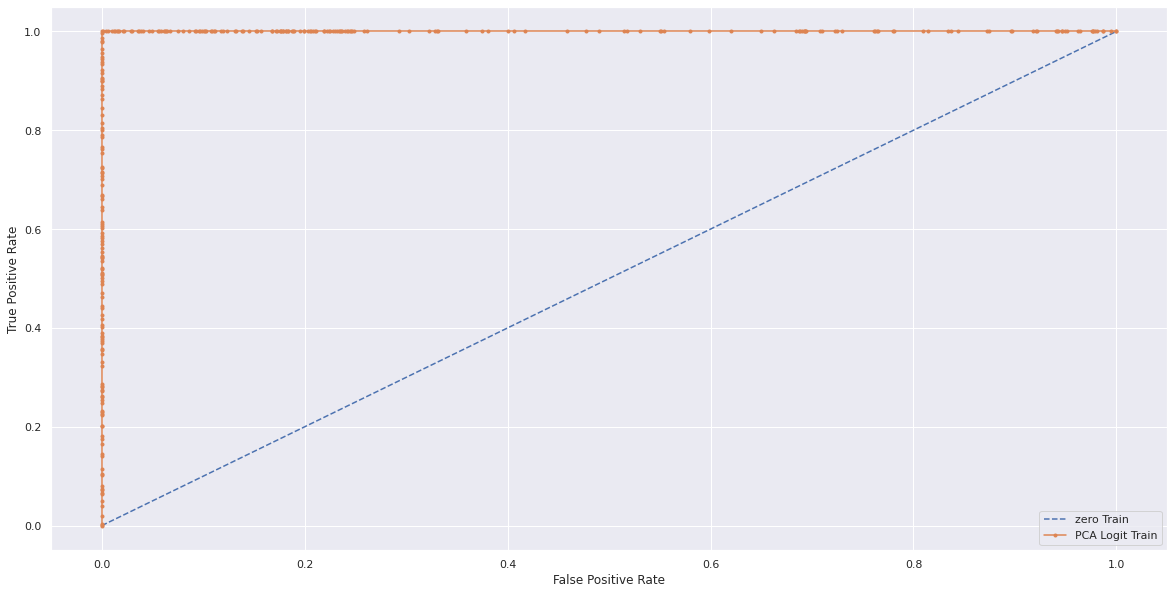

In [ ]:
# Use the PCA predict method on the train data
predPCA_train = GLMPCA.predict_proba(train_pca)

predPCA_train = predPCA_train[:, 1]
# len(predPCA_train)

# calculate scores
ns_probs = [0 for _ in range(len(target_train_PCA))]

ns_auc = roc_auc_score(target_train_PCA, ns_probs)
pred_train_auc = roc_auc_score(target_train_PCA, predPCA_train)
 
 # summarize scores
# print(': ROC AUC=%.3f' % (ns_auc))
print('PCA LOGIT  ROC AUC=%.3f' % (pred_train_auc))


ns_fpr, ns_tpr, _ = roc_curve(target_train_PCA, ns_probs)
pred_fpr, pred_tpr, _ = roc_curve(target_train_PCA, predPCA_train)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='zero Train ')
plt.plot(pred_fpr, pred_tpr, marker='.', label='PCA Logit Train')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
#Logistic regression after PC transformation using test set


predPCA_test = GLMPCA.predict(test_pca)
predPCA_test

accuracy = accuracy_score(predPCA_test, target_test_PCA)
print(f"LogisticRegresion_test after PCA tranformation accuracy is {accuracy}")
sensitiviy =recall_score(predPCA_test, target_test_PCA)
print(f"LogisticRegresion_test after PCA tranformation sensitivy is {sensitiviy}")

cm = confusion_matrix(predPCA_test, target_test_PCA)
cm
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(f"Specificity accuracy for LogisticRegresion_test after PCA tranformation test is {specificity}")


LogisticRegresion_test after PCA tranformation accuracy is 1.0
LogisticRegresion_test after PCA tranformation sensitivy is 1.0
Specificity accuracy for LogisticRegresion_test after PCA tranformation test is 1.0


PCA -test LOGIT  ROC AUC=1.000


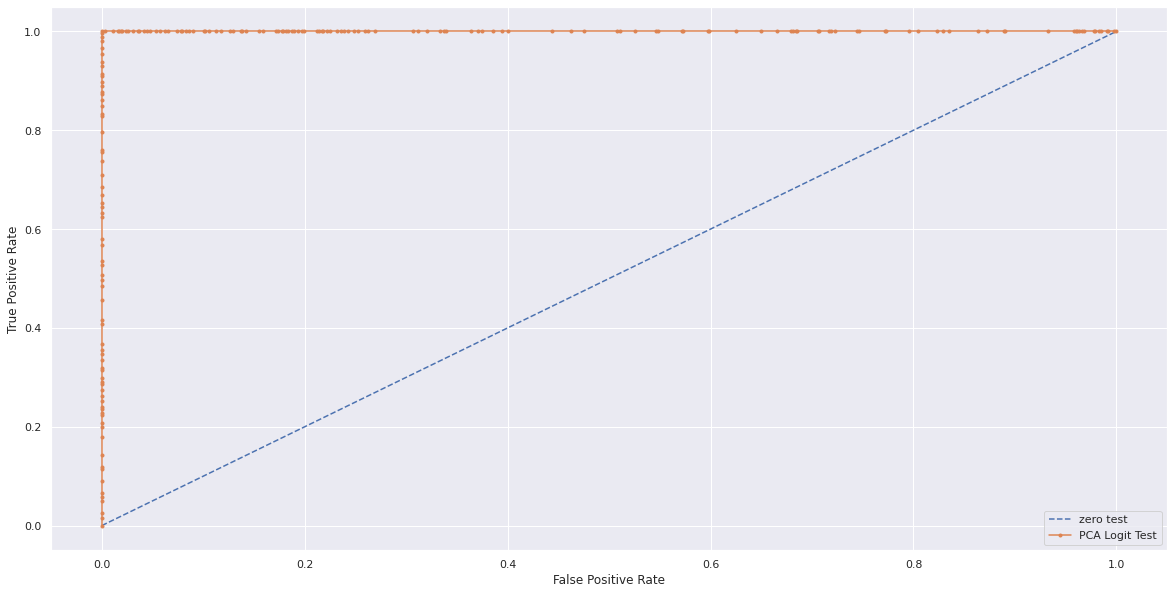

In [ ]:
# Use the PCA predict method on the test data
predPCA_test_prob = GLMPCA.predict_proba(test_pca)

predPCA_test_prob = predPCA_test_prob[:, 1]
# len(predPCA_train)

# calculate scores
ns_probs = [0 for _ in range(len(target_test_PCA))]

ns_auc = roc_auc_score(target_test_PCA, ns_probs)
pred_train_auc = roc_auc_score(target_test_PCA, predPCA_test_prob)
 
 # summarize scores
# print(': ROC AUC=%.3f' % (ns_auc))
print('PCA -test LOGIT  ROC AUC=%.3f' % (pred_train_auc))


ns_fpr, ns_tpr, _ = roc_curve(target_test_PCA, ns_probs)
pred_fpr, pred_tpr, _ = roc_curve(target_test_PCA, predPCA_test_prob)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='zero test ')
plt.plot(pred_fpr, pred_tpr, marker='.', label='PCA Logit Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:

#Neural netwaorks (Model 3)
#**data selection & train/test split**

sub_list_NN = ["LIMIT_BAL_below_30k","LIMIT_BAL_above_160k","SEX_FEMALE",
              "Married_Y","AGE_25to35","PAY_X_Sum_6mo_belowZero","PAY_X_Sum_6mo_aboveFive",
              "Max_Bill_Amt_below_600","Max_Bill_Amt_below_4k","Max_Bill_Amt_below_18k",
              "Max_Bill_Amt_above_52k","Avg_Pmt_Amt_below2k","Avg_Pmt_Amt_above12k",
              "Avg_Util_below_.001","Avg_Util_above_.45","Avg_Pay_Ratio_above_.113","Avg_Pay_Ratio_above_1",
              "Max_DLQ_above1","Balance_Growth_6mo_below_minus21k","Util_Growth_6mo_below_minus.03",
              "Util_Growth_6mo_above_0","target"]


target_train_NN = raw_data.loc[(raw_data["data.group"]==1),"target" ] 
target_test_NN = raw_data.loc[(raw_data["data.group"]==2),"target" ] 
xtrain_NN = raw_data.loc[(raw_data["data.group"]==1),sub_list_NN] 
xtest_NN = raw_data.loc[(raw_data["data.group"]==2),sub_list_NN ] 
validate_NN = raw_data.loc[(raw_data["data.group"]==3),sub_list_NN] 

xtrain_NN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2408 entries, 0 to 4795
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   LIMIT_BAL_below_30k                2408 non-null   int64   
 1   LIMIT_BAL_above_160k               2408 non-null   int64   
 2   SEX_FEMALE                         2408 non-null   int64   
 3   Married_Y                          2408 non-null   int64   
 4   AGE_25to35                         2408 non-null   int64   
 5   PAY_X_Sum_6mo_belowZero            2408 non-null   int64   
 6   PAY_X_Sum_6mo_aboveFive            2408 non-null   int64   
 7   Max_Bill_Amt_below_600             2408 non-null   int64   
 8   Max_Bill_Amt_below_4k              2408 non-null   int64   
 9   Max_Bill_Amt_below_18k             2408 non-null   int64   
 10  Max_Bill_Amt_above_52k             2408 non-null   int64   
 11  Avg_Pmt_Amt_below2k                2408 non

In [ ]:
NNclf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
# neural netwroks fitting using multi-layer perception
NNclf.fit(xtrain_NN,target_train_NN)
predNN_train = NNclf.predict(xtrain_NN)
predNN_train

array([1., 0., 0., ..., 1., 1., 0.])

In [ ]:


accuracy = accuracy_score(predNN_train, target_train_NN)
print(f"Neural network Multi-layer Perceptron_train accuracy is {accuracy}")
sensitiviy =recall_score(predNN_train, target_train_NN)
print(f"Neural network Multi-layer Perceptron_train sensitivy is {sensitiviy}")

cm = confusion_matrix(predNN_train, target_train_NN)
cm
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(f"Specificity accuracy for Neural network Multi-layer Perceptron_train is {specificity}")


Neural network Multi-layer Perceptron_train accuracy is 1.0
Neural network Multi-layer Perceptron_train sensitivy is 1.0
Specificity accuracy for Neural network Multi-layer Perceptron_train is 1.0


Neural network -train   ROC AUC=1.000


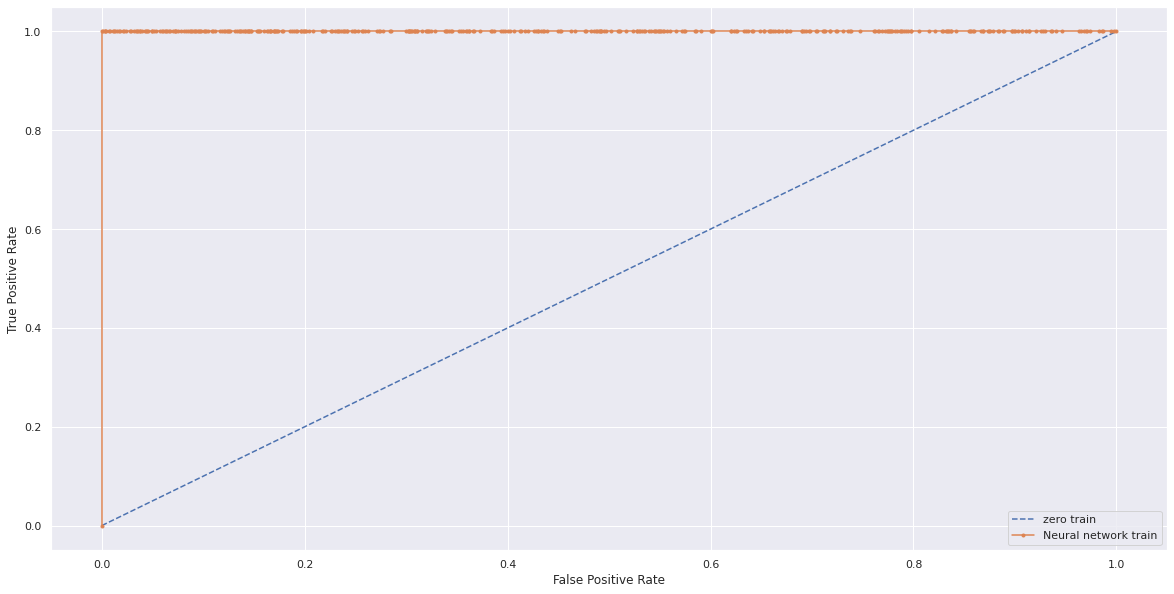

In [ ]:
# Use the Neural network predict on predict method on the train data
predNN_train_prob = NNclf.predict_proba(xtrain_NN)

predNN_train_prob = predNN_train_prob[:, 1]


# calculate scores
ns_probs = [0 for _ in range(len(target_train_NN))]

ns_auc = roc_auc_score(target_train_NN, ns_probs)
pred_train_auc = roc_auc_score(target_train_NN, predNN_train_prob)
 
 # summarize scores
# print(': ROC AUC=%.3f' % (ns_auc))
print('Neural network -train   ROC AUC=%.3f' % (pred_train_auc))


ns_fpr, ns_tpr, _ = roc_curve(target_train_NN, ns_probs)
pred_fpr, pred_tpr, _ = roc_curve(target_train_NN, predNN_train_prob)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='zero train ')
plt.plot(pred_fpr, pred_tpr, marker='.', label='Neural network train')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [ ]:
# Neural network using multi-layer perception on test data 
predNN_test = NNclf.predict(xtest_NN)
predNN_test

accuracy = accuracy_score(predNN_test, target_test_NN)
print(f"Neural network Multi-layer Perceptron_test accuracy is {accuracy}")
sensitiviy =recall_score(predNN_test, target_test_NN)
print(f"Neural network Multi-layer Perceptron_test sensitivy is {sensitiviy}")

cm = confusion_matrix(predNN_test, target_test_NN)
cm
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(f"Specificity accuracy for Neural network Multi-layer Perceptron_test is {specificity}")

Neural network Multi-layer Perceptron_test accuracy is 1.0
Neural network Multi-layer Perceptron_test sensitivy is 1.0
Specificity accuracy for Neural network Multi-layer Perceptron_test is 1.0


In [ ]:
## Principal Components & Neural Network - PCANNet (Model 4)    
#**data selection & train/test split**   
#**remove:** Avg_Util, Avg_Pay_Ratio & Util_Growth_6mo   
sub_list_PCA = ["LIMIT_BAL_below_30k","LIMIT_BAL_above_160k","SEX_FEMALE",
              "Married_Y","AGE_25to35","PAY_X_Sum_6mo_belowZero","PAY_X_Sum_6mo_aboveFive",
              "Max_Bill_Amt_below_600","Max_Bill_Amt_below_4k","Max_Bill_Amt_below_18k",
              "Max_Bill_Amt_above_52k","Avg_Pmt_Amt_below2k","Avg_Pmt_Amt_above12k",
              "Max_DLQ_above1","Balance_Growth_6mo_below_minus21k","target"]

target_train_PCA =raw_data.loc[(raw_data["data.group"]==1),"target"] 
target_test_PCA =raw_data.loc[(raw_data["data.group"]==2),"target"] 

xtrain_PCA = raw_data.loc[(raw_data["data.group"]==1),sub_list_PCA ] 
xtest_PCA = raw_data.loc[(raw_data["data.group"]==2),sub_list_PCA ] 
validate_PCA = raw_data.loc[(raw_data["data.group"]==3),sub_list_PCA ] 

xtrain_PCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2408 entries, 0 to 4795
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   LIMIT_BAL_below_30k                2408 non-null   int64   
 1   LIMIT_BAL_above_160k               2408 non-null   int64   
 2   SEX_FEMALE                         2408 non-null   int64   
 3   Married_Y                          2408 non-null   int64   
 4   AGE_25to35                         2408 non-null   int64   
 5   PAY_X_Sum_6mo_belowZero            2408 non-null   int64   
 6   PAY_X_Sum_6mo_aboveFive            2408 non-null   int64   
 7   Max_Bill_Amt_below_600             2408 non-null   int64   
 8   Max_Bill_Amt_below_4k              2408 non-null   int64   
 9   Max_Bill_Amt_below_18k             2408 non-null   int64   
 10  Max_Bill_Amt_above_52k             2408 non-null   int64   
 11  Avg_Pmt_Amt_below2k                2408 non

In [ ]:
pca.fit(xtrain_PCA)
train_pca = pca.transform(xtrain_PCA)
test_pca = pca.transform(xtest_PCA)

In [ ]:
# predicting neural network with Principal analysis components
NNclf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
# neural netwroks fitting using multi-layer perception
NNclf.fit(train_pca,target_train_PCA)
predNNPCA_train = NNclf.predict(train_pca)
predNNPCA_train

array([1., 0., 0., ..., 1., 1., 0.])

In [ ]:
accuracy = accuracy_score(predNNPCA_train, target_train_PCA)
print(f"PCA Neural network Multi-layer Perceptron_train accuracy is {accuracy}")
sensitiviy =recall_score(predNNPCA_train, target_train_PCA)
print(f"PCA Neural network Multi-layer Perceptron_train sensitivy is {sensitiviy}")

cm = confusion_matrix(predNNPCA_train, target_train_PCA)
cm
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(f"Specificity accuracy for PCA Neural network Multi-layer Perceptron_train is {specificity}")

PCA Neural network Multi-layer Perceptron_train accuracy is 1.0
PCA Neural network Multi-layer Perceptron_train sensitivy is 1.0
Specificity accuracy for PCA Neural network Multi-layer Perceptron_train is 1.0


PCA Neural network -train   ROC AUC=1.000


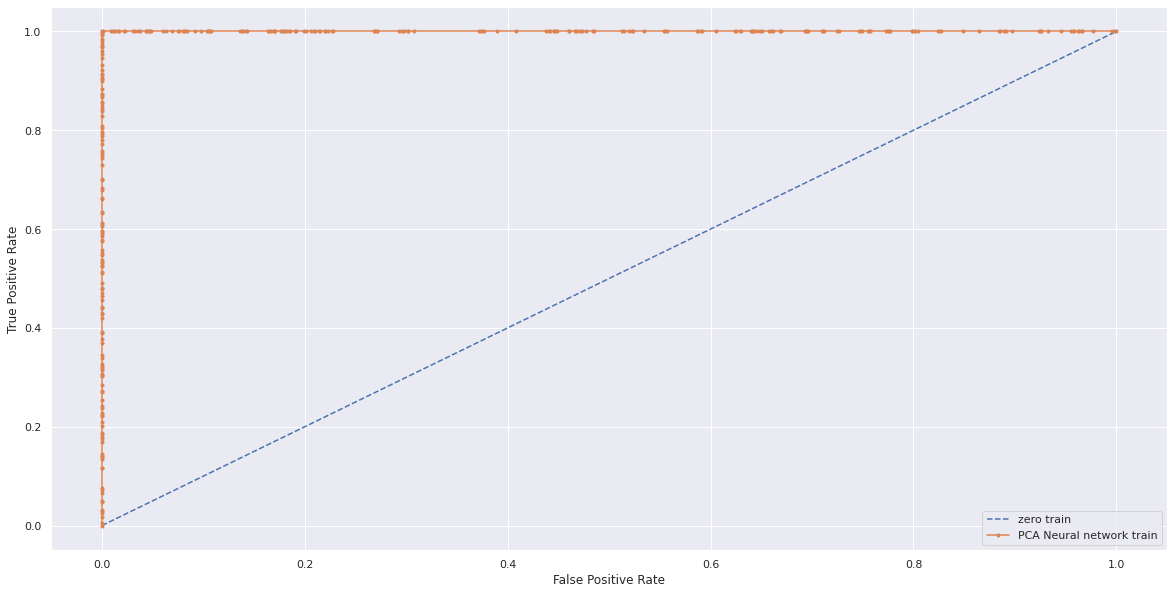

In [ ]:
# Use the Neural network predict on predict method on the train data
predNNPCA_train_prob = NNclf.predict_proba(train_pca)
predNNPCA_train_prob = predNNPCA_train_prob[:, 1]


# calculate scores
ns_probs = [0 for _ in range(len(target_train_PCA))]

ns_auc = roc_auc_score(target_train_NN, ns_probs)
pred_train_auc = roc_auc_score(target_train_PCA, predNNPCA_train_prob)
 
 # summarize scores
# print(': ROC AUC=%.3f' % (ns_auc))
print('PCA Neural network -train   ROC AUC=%.3f' % (pred_train_auc))


ns_fpr, ns_tpr, _ = roc_curve(target_train_PCA, ns_probs)
pred_fpr, pred_tpr, _ = roc_curve(target_train_PCA, predNNPCA_train_prob)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='zero train ')
plt.plot(pred_fpr, pred_tpr, marker='.', label='PCA Neural network train')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [ ]:

predNNPCA_test = NNclf.predict(test_pca)
predNNPCA_test

accuracy = accuracy_score(predNNPCA_test, target_test_PCA)
print(f"Neural network Multi-layer Perceptron_test accuracy is {accuracy}")
sensitiviy =recall_score(predNNPCA_test, target_test_PCA)
print(f"Neural network Multi-layer Perceptron_test sensitivy is {sensitiviy}")

cm = confusion_matrix(predNNPCA_test, target_test_PCA)
cm
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(f"Specificity accuracy for Neural network Multi-layer Perceptron_test is {specificity}")

Neural network Multi-layer Perceptron_test accuracy is 1.0
Neural network Multi-layer Perceptron_test sensitivy is 1.0
Specificity accuracy for Neural network Multi-layer Perceptron_test is 1.0
